<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train_a2c_multi_stock_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.0
    Uninstalling protobuf-6.31.0:
      Successfully uninstalled protobuf-6.31.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 req

In [6]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.11.2
Uninstalling dask-2024.11.2:
  Successfully uninstalled dask-2024.11.2
Found existing installation: cudf-cu12 24.12.0
Uninstalling cudf-cu12-24.12.0:
  Successfully uninstalled cudf-cu12-24.12.0
Found existing installation: cuml-cu12 24.12.0
Uninstalling cuml-cu12-24.12.0:
  Successfully uninstalled cuml-cu12-24.12.0
Found existing installation: rapids-dask-dependency 24.12.0
Uninstalling rapids-dask-dependency-24.12.0:
  Successfully uninstalled rapids-dask-dependency-24.12.0
Found existing installation: pylibraft-cu12 24.12.0
Uninstalling pylibraft-cu12-24.12.0:
  Successfully uninstalled pylibraft-cu12-24.12.0
Found existing installation: pylibcudf-cu12 24.12.0
Uninstalling pylibcudf-cu12-24.12.0:
  Successfully uninstalled pylibcudf-cu12-24.12.0
Found existing installation: numba 0.61.0
Uninstalling numba-0.61.0:
  Successfully uninstalled numba-0.61.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6

In [7]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Using cached dask-2024.11.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached rapids_dask_dependency-24.12.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached cudf_cu12-24.12.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (6.2 kB)
  Using cached cuml_cu12-24.12.0-cp311-cp311-manylinux_2_28_x86_64.whl
  Using cached pylibraft_cu12-24.12.0-cp311-cp311-manylinux_2_28_x86_64.whl
  Using cached pylibcudf_cu12-24.12.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (4.9 kB)
  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fsspec-2025.5.1-

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print("cuDF Version:", cudf.__version__)
print("cuML Version:", cuml.__version__)
print("Dask Version:", dask.__version__)
print("Stable Baselines3 Installed:", stable_baselines3.__version__)
print("Gymnasium Version:", gymnasium.__version__)
print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Pandas Version:", pandas.__version__)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

[I] [21:57:05.539185] Import of umap.umap_.nearest_neighbors failed with: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cuml/internals/safe_imports.py", line 312, in safe_import_from
    imported_module = importlib.import_module(module)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1126, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>"

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: []


In [4]:
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:

try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print("cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



cuDF GPU check failed: Function "cuInit" not found


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

#Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

#RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print("cuDF & cuML are available and running on GPU.")
except ImportError:
    print("cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

#Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory issue: {e}")

#Google Drive Access (for Colab)
from google.colab import drive


cuDF & cuML are available and running on GPU.


In [8]:
# ✅ A2C Date-Based Walkforward Script for Multistock (with GPU Option + Accuracy)

# === Mount Google Drive ===
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_a2c_walkforward"
os.makedirs(RESULTS_DIR + "/data", exist_ok=True)

# === Imports ===
import gc
import torch
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.spaces import Discrete
from gym_anytrading.envs import StocksEnv

# === Date Ranges ===
train_start = pd.to_datetime("2023-06-01").tz_localize("UTC")
train_end = pd.to_datetime("2024-06-01").tz_localize("UTC")
test_start = pd.to_datetime("2024-06-01").tz_localize("UTC")
test_end = pd.to_datetime("2025-04-28").tz_localize("UTC")

TICKERS = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

# === Helper Functions ===
def clean_stock_data(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.rename(columns=lambda x: x.capitalize(), inplace=True)
    df.rename(columns={'Adj Close': 'Close'}, inplace=True)
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df.dropna(subset=['Datetime', 'Close'], inplace=True)
    df['Datetime'] = df['Datetime'].dt.tz_convert("UTC")
    df.sort_values(by='Datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

def compute_technical_indicators(df):
    df['ATR'] = (df['High'] - df['Low']).rolling(window=14).mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    macd_fast = df['Close'].ewm(span=12).mean()
    macd_slow = df['Close'].ewm(span=26).mean()
    df['MACD_Line'] = macd_fast - macd_slow
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(window=14).mean()
    loss = -delta.clip(upper=0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Volume_Avg'] = df['Volume'].rolling(window=20).mean()
    df['ADX'] = abs(df['High'] - df['Low']).rolling(window=14).mean()
    df.dropna(inplace=True)
    return df

class DiscreteTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Discrete(3)  # 0: SELL, 1: HOLD, 2: BUY

    def step(self, action):
        return super().step(action)

# === Main Training Loop ===
window_size = 10
initial_balance = 100000
results = []
device = "cpu"

for ticker in TICKERS:
    print(f"\n Processing {ticker}")
    try:
        df = yf.download(ticker, period="720d", interval="1h", progress=False)
        if df.empty:
            print(f" No data for {ticker}")
            continue

        df.reset_index(inplace=True)
        df = clean_stock_data(df)
        df = compute_technical_indicators(df)

        df_train = df[(df['Datetime'] >= train_start) & (df['Datetime'] < train_end)].copy()
        df_test = df[(df['Datetime'] >= test_start) & (df['Datetime'] <= test_end)].copy()

        if len(df_train) < 300 or len(df_test) < 100:
            print(f" Skipping {ticker}: insufficient data.")
            continue

        env_train = DummyVecEnv([lambda: DiscreteTradingEnv(df_train, (50, len(df_train)), window_size)])
        env_test = DummyVecEnv([lambda: DiscreteTradingEnv(df_test, (50, len(df_test)), window_size)])

        model = A2C("MlpPolicy", env_train,
                    learning_rate=0.0003,
                    gamma=0.99,
                    gae_lambda=0.95,
                    n_steps=5,
                    ent_coef=0.01,
                    vf_coef=0.5,
                    verbose=0,
                    device=device)

        model.learn(total_timesteps=10000)

        obs = env_test.reset()
        trade_log, buy_price = [], None
        balance, position = initial_balance, 0
        portfolio = []
        wins, total_trades = 0, 0
        prices = df_test['Close'].values

        for i in range(len(df_test) - 50):
            action, _ = model.predict(obs)
            obs, _, done, _ = env_test.step([action])[:4]
            price = prices[i + 50]

            if action == 2 and buy_price is None:
                buy_price = price
                position = balance / price
                balance = 0
                trade_log.append("BUY")
            elif action == 0 and buy_price is not None:
                balance = position * price
                profit = balance - initial_balance
                if profit > 0:
                    wins += 1
                total_trades += 1
                position = 0
                buy_price = None
                trade_log.append("SELL")
            else:
                trade_log.append("HOLD")

            value = balance if balance > 0 else position * price
            portfolio.append(value)
            if done[0]:
                break

        final_value = portfolio[-1]
        daily_returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (daily_returns.mean() / (daily_returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100
        return_pct = ((final_value / initial_balance) - 1) * 100
        accuracy = wins / total_trades if total_trades > 0 else 0

        results.append({
            "Ticker": ticker,
            "Sharpe": round(sharpe, 4),
            "Accuracy": round(accuracy, 4),
            "Drawdown": round(drawdown, 2),
            "Return": round(return_pct, 2),
            "Final_Portfolio": round(final_value, 2)
        })

        ticker_df = pd.DataFrame({
            "Date": df_test['Datetime'].iloc[50:50+len(portfolio)].values,
            "Portfolio Value": portfolio
        })
        ticker_df.to_csv(f"{RESULTS_DIR}/data/{ticker}_portfolio.csv", index=False)

        del model, env_train, env_test
        gc.collect()
        torch.cuda.empty_cache()

    except Exception as e:
        print(f" Error with {ticker}: {e}")

# === Save Results ===
results_df = pd.DataFrame(results)
results_df.to_csv(f"{RESULTS_DIR}/a2c_datebased_walkforward_summary.csv", index=False)
print("\n A2C walkforward evaluation complete. Results saved.")


Mounted at /content/drive

 Processing AAPL

 Processing TSLA

 Processing MSFT

 Processing GOOGL

 Processing AMZN

 Processing NVDA

 Processing META

 Processing BRK-B

 Processing JPM

 Processing JNJ

 Processing XOM

 Processing V

 Processing PG

 Processing UNH

 Processing MA

 Processing HD

 Processing LLY

 Processing MRK

 Processing PEP

 Processing KO

 Processing BAC

 Processing ABBV

 Processing AVGO

 Processing PFE

 Processing COST

 Processing CSCO

 Processing TMO

 Processing ABT

 Processing ACN

 Processing WMT

 Processing MCD

 Processing ADBE

 Processing DHR

 Processing CRM

 Processing NKE

 Processing INTC

 Processing QCOM

 Processing NEE

 Processing AMD

 Processing TXN

 Processing AMGN

 Processing UPS

 Processing LIN

 Processing PM

 Processing UNP

 Processing BMY

 Processing LOW

 Processing RTX

 Processing CVX

 Processing IBM

 Processing GE

 Processing SBUX

 Processing ORCL

 A2C walkforward evaluation complete. Results saved.



 Top 5 Tickers:
Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/INTC_a2c_portfolio_top.png


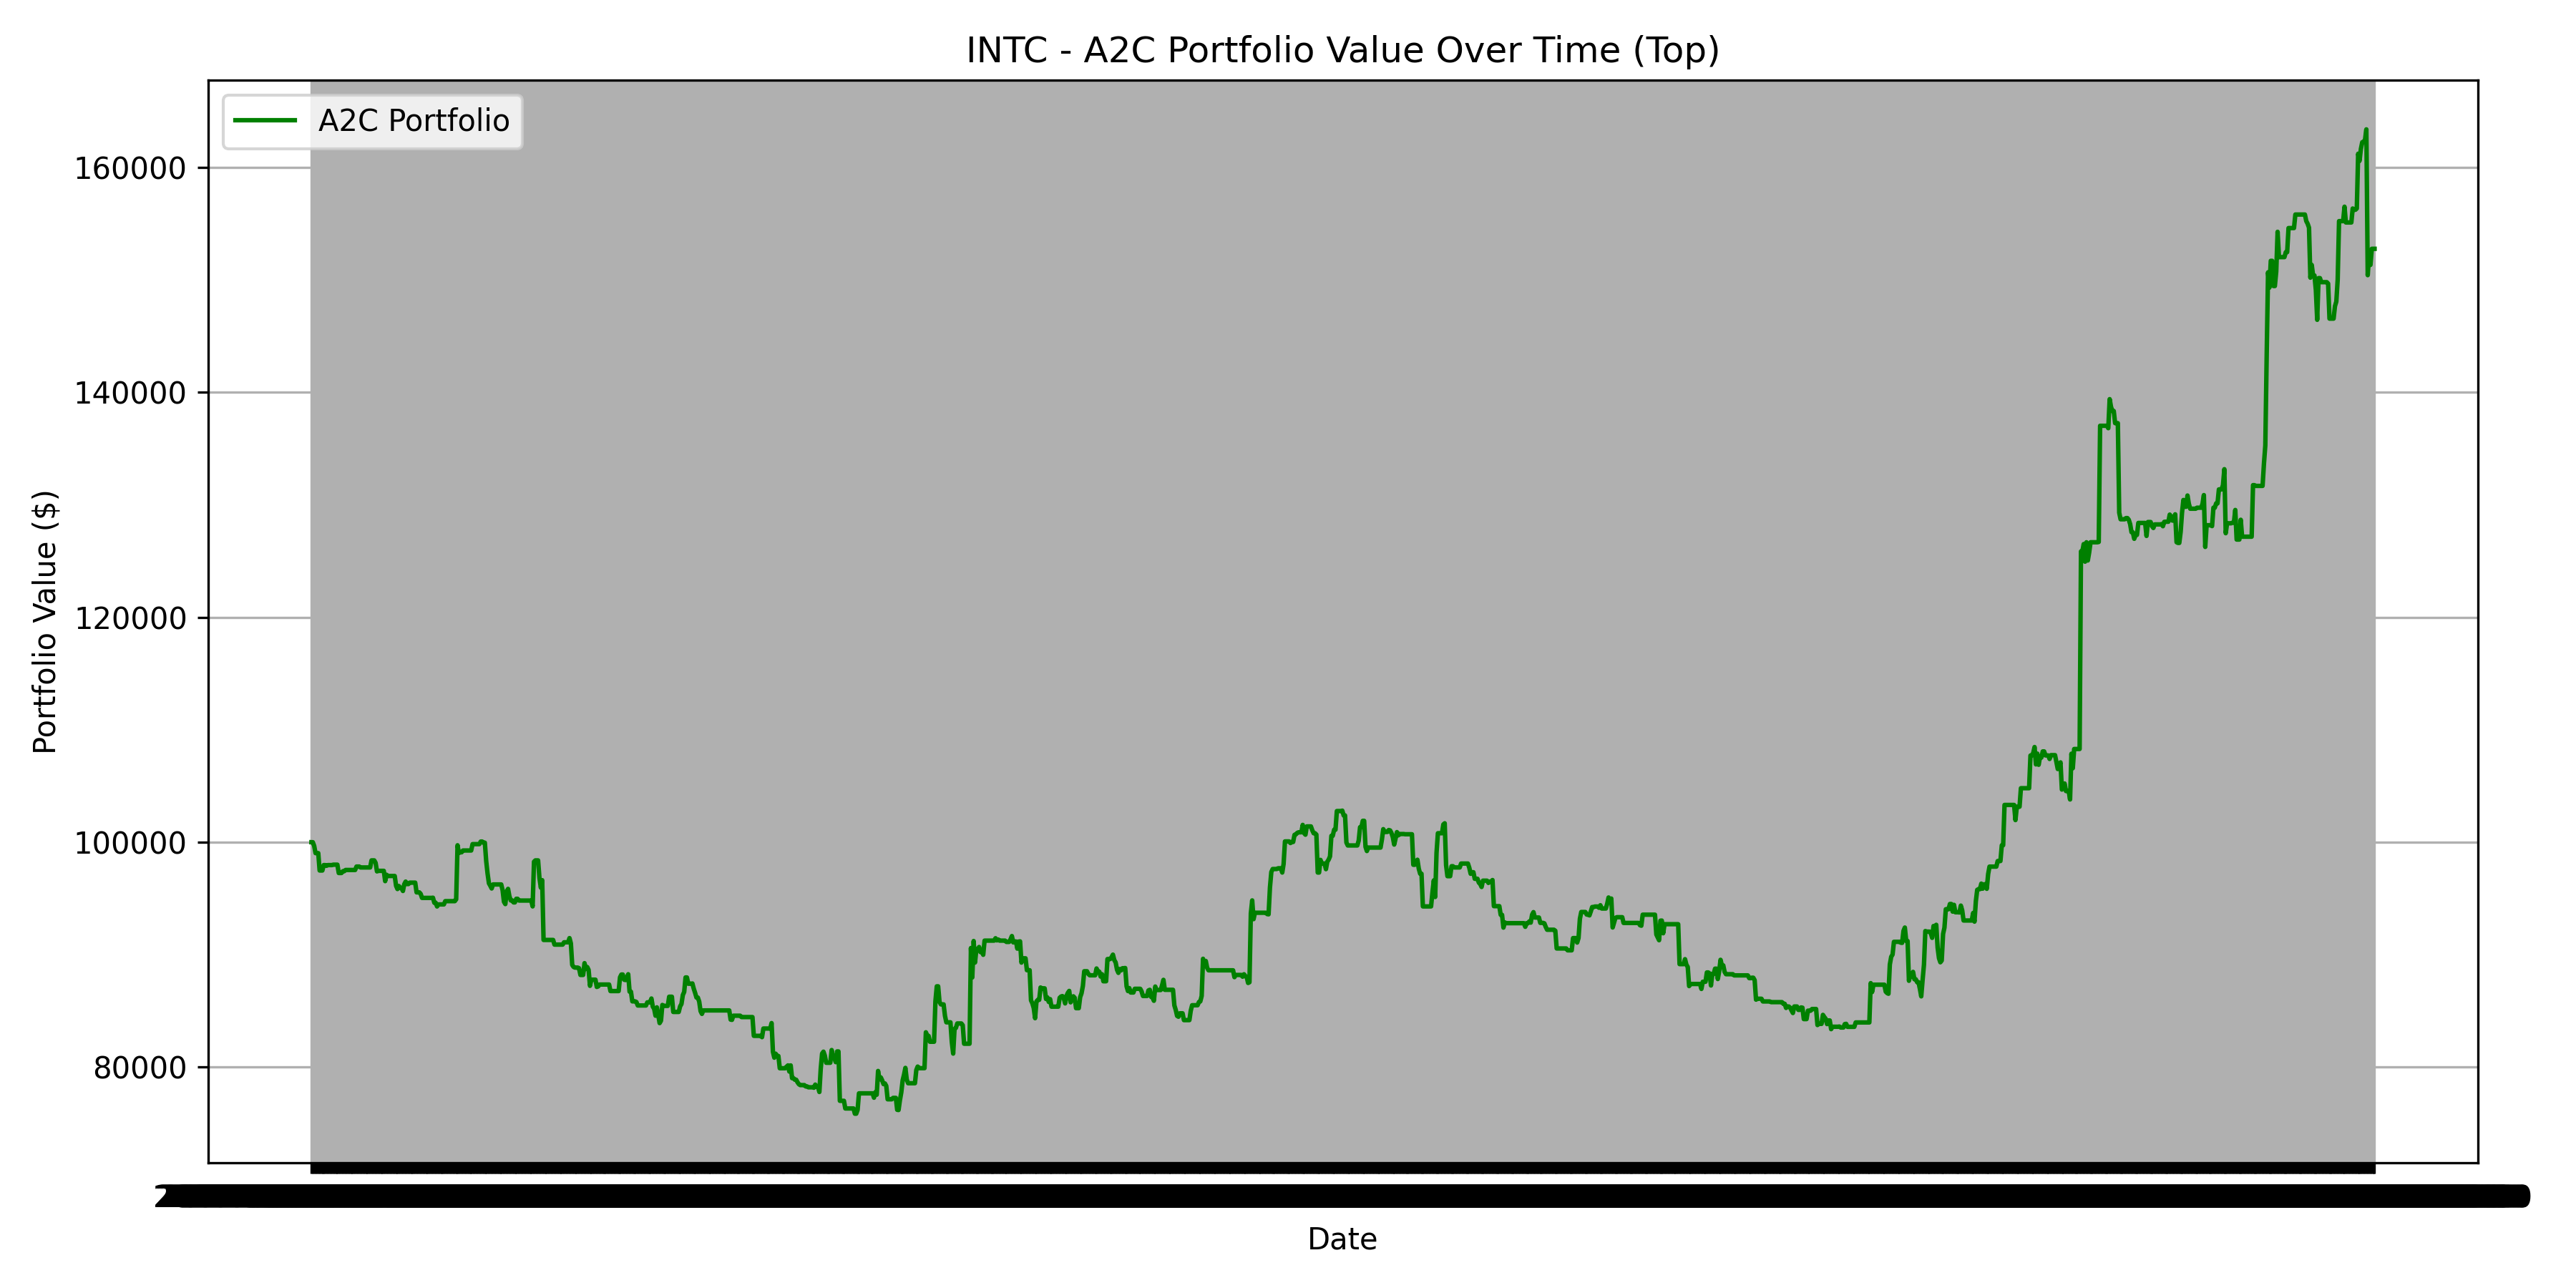

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/TSLA_a2c_portfolio_top.png


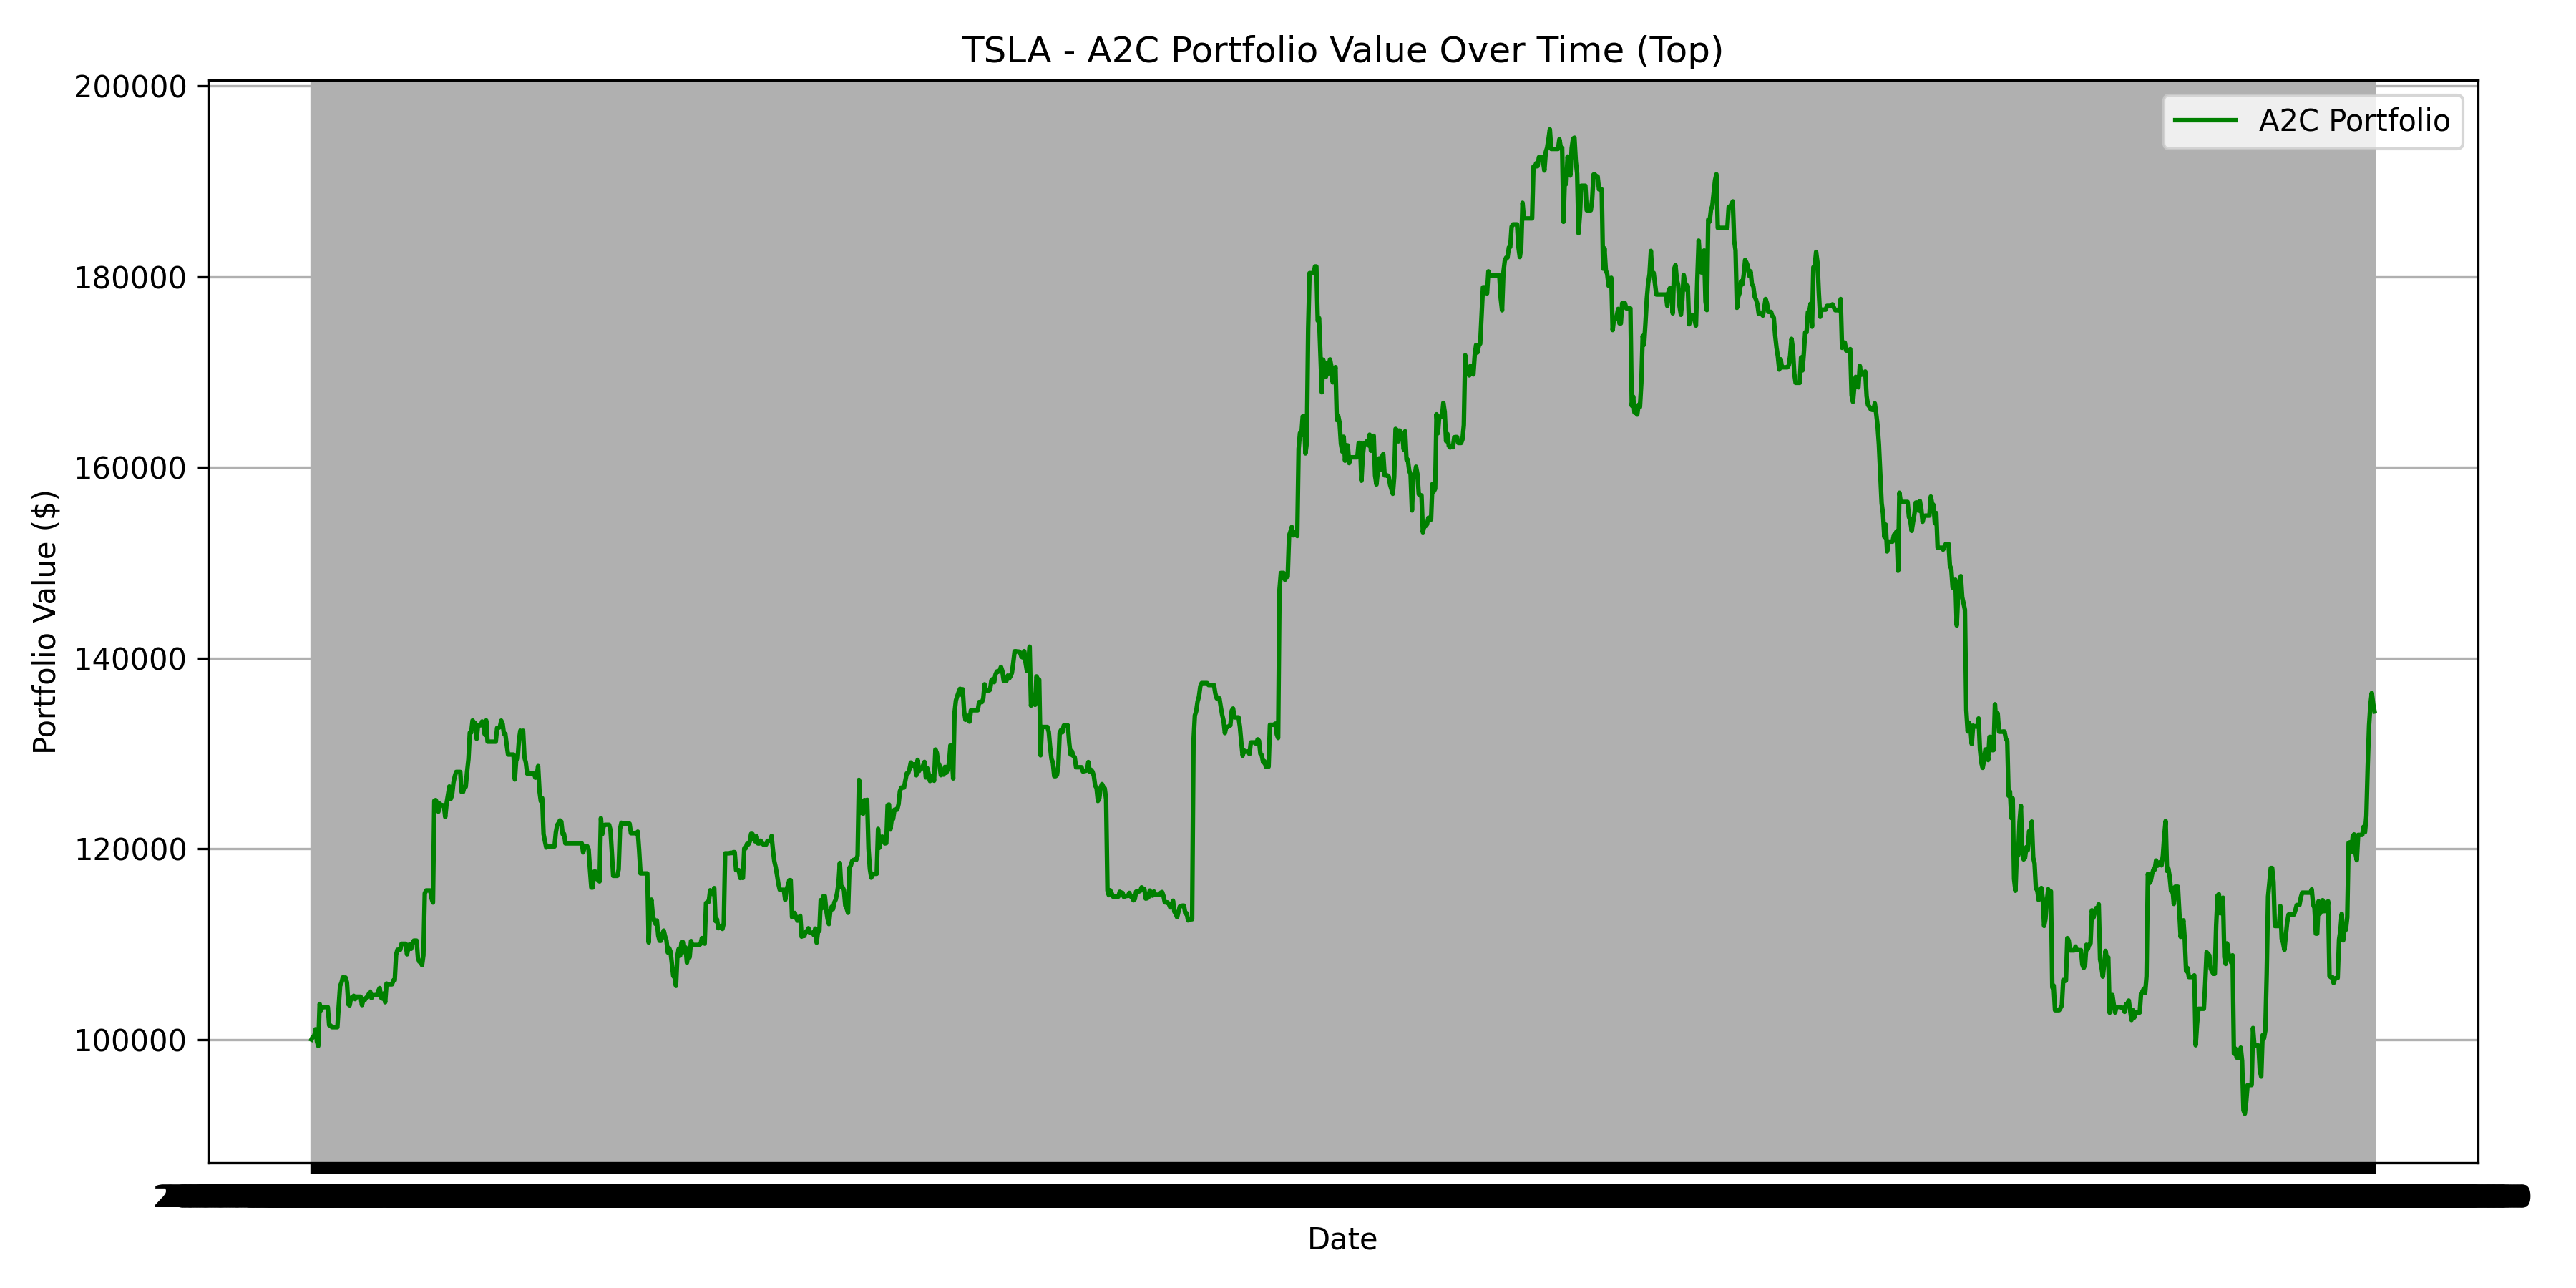

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/IBM_a2c_portfolio_top.png


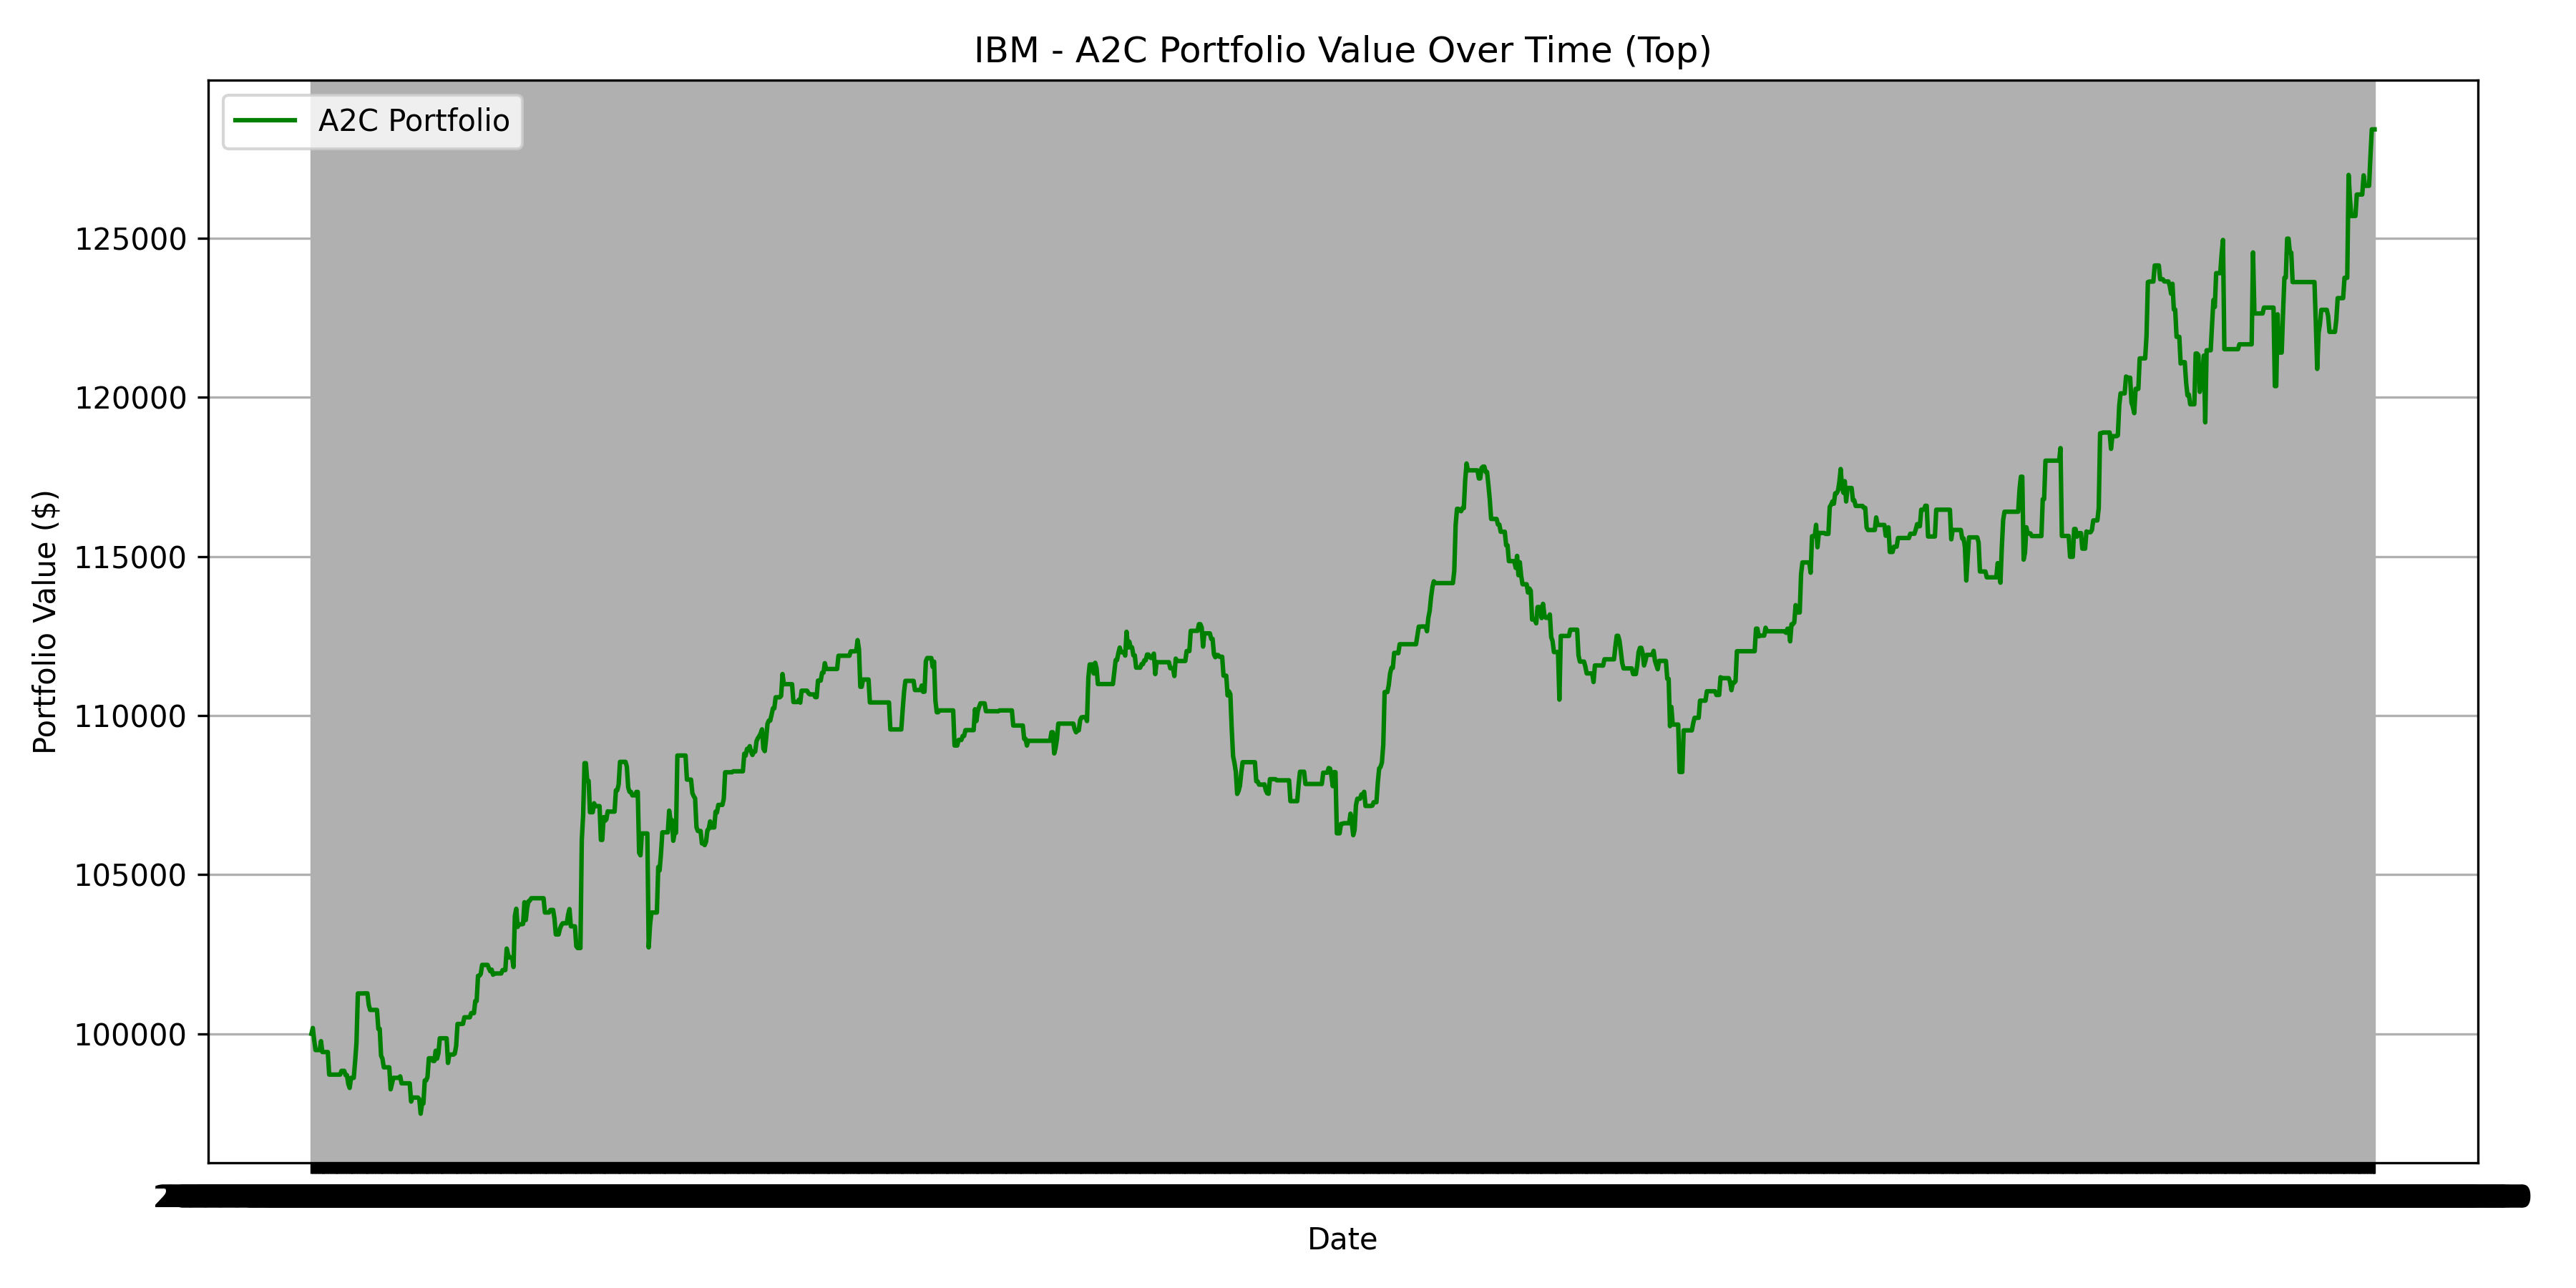

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/BRK-B_a2c_portfolio_top.png


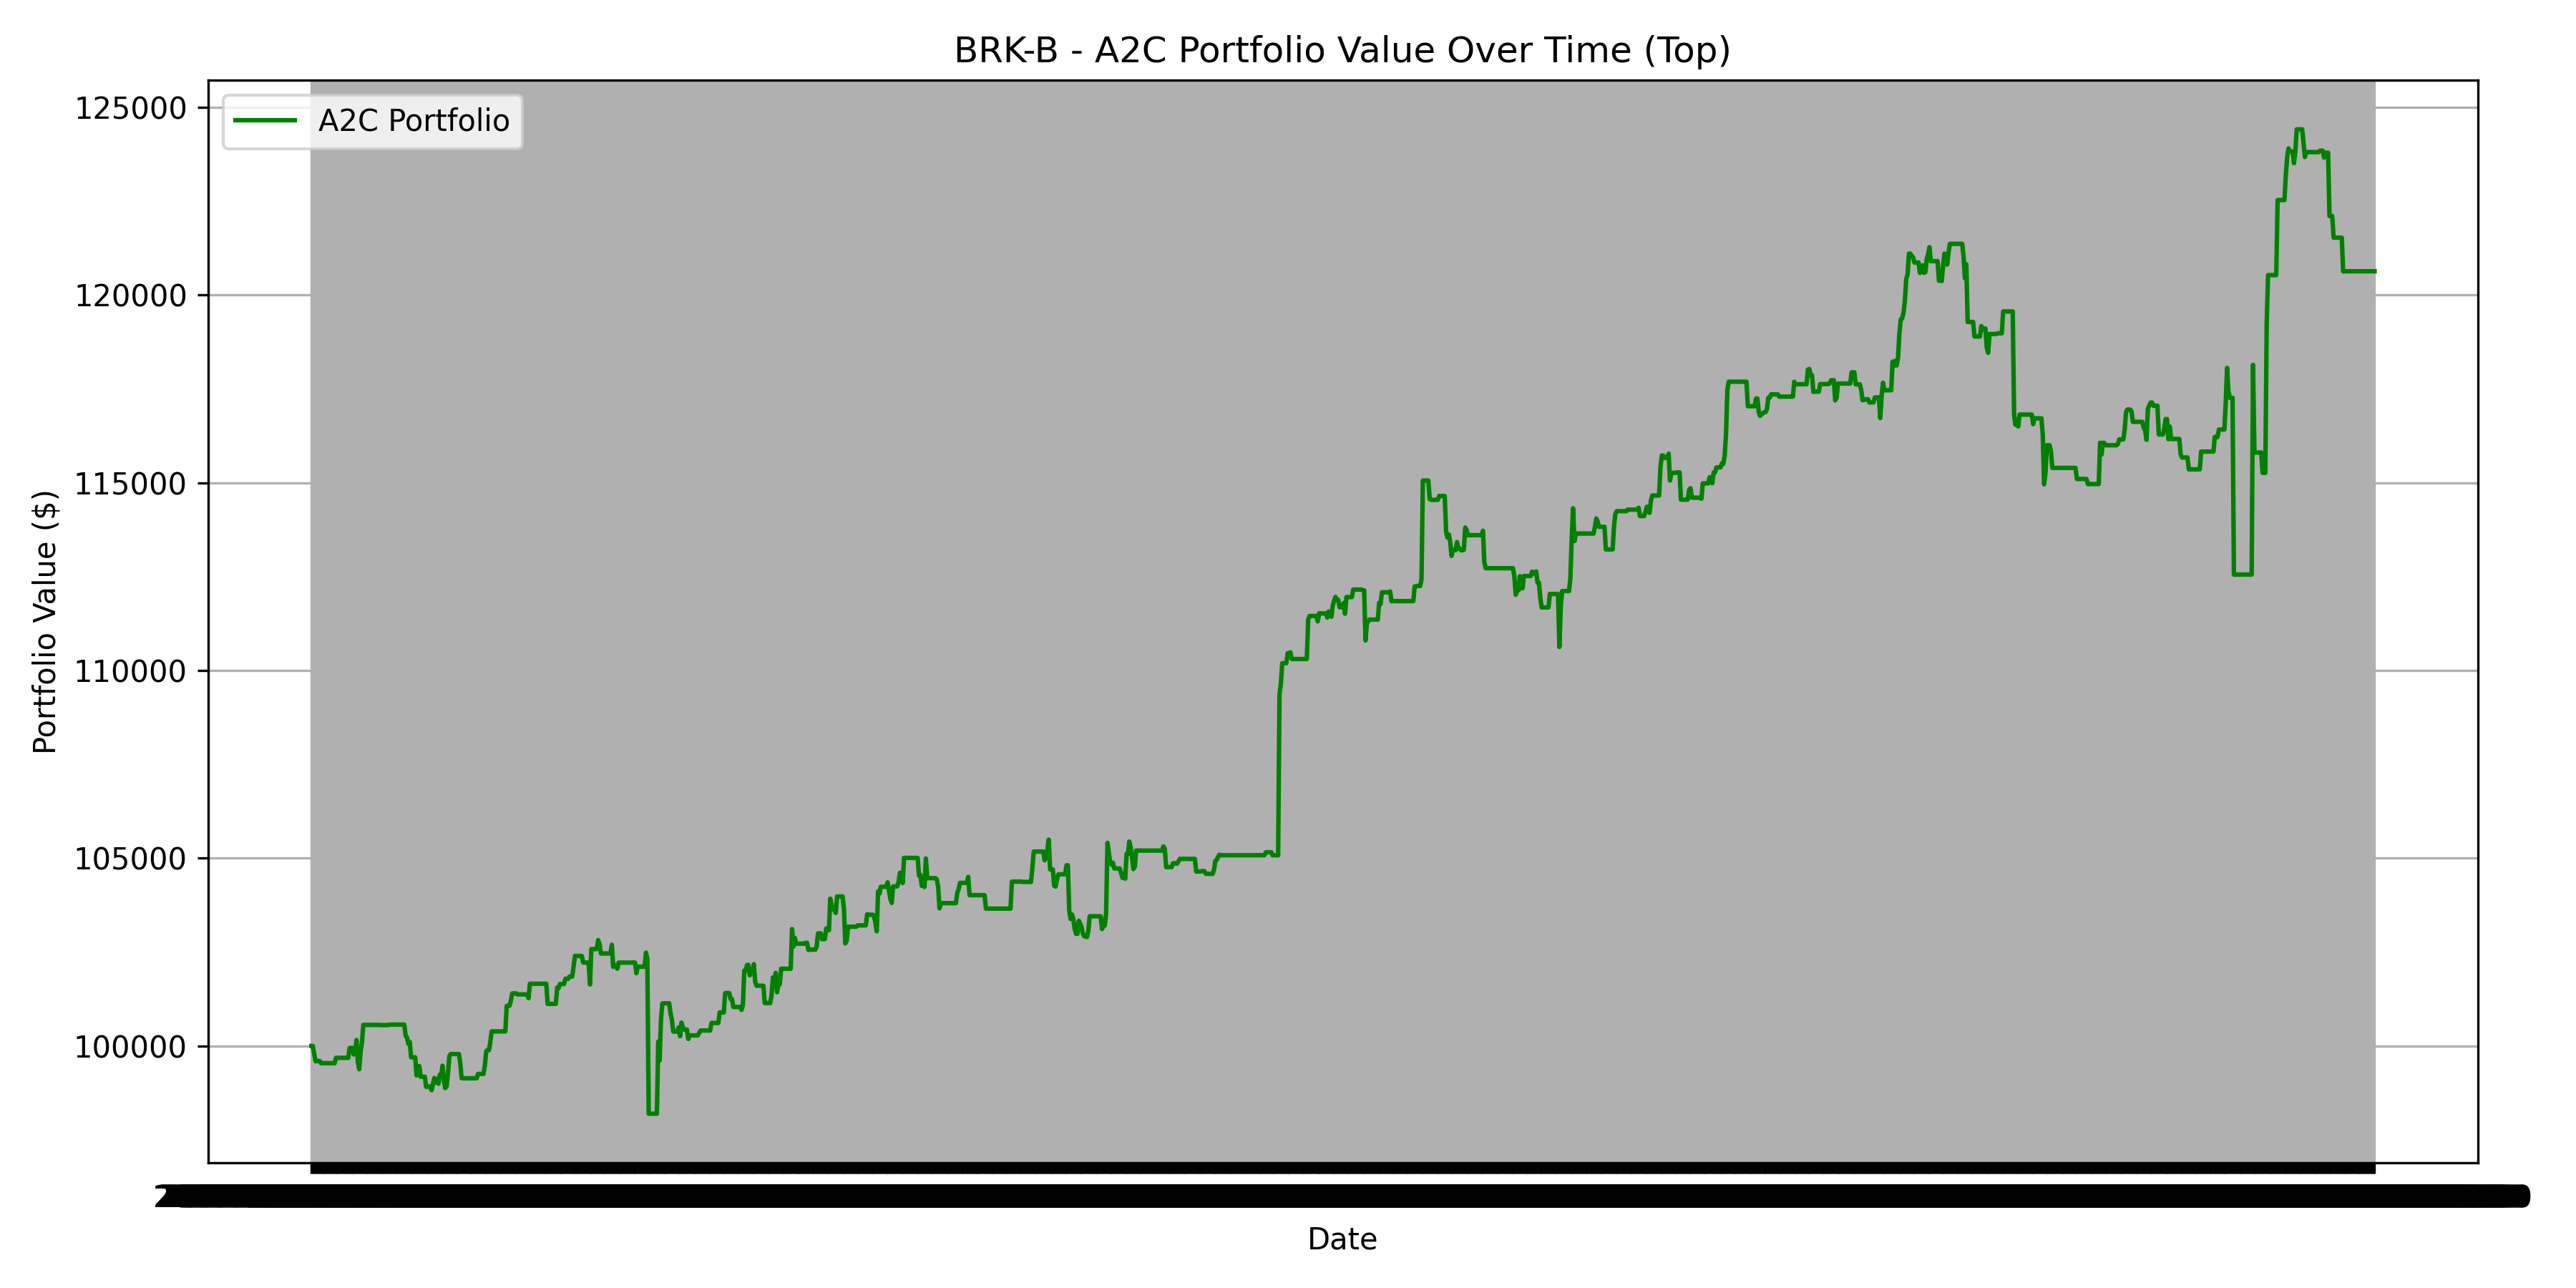

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/LOW_a2c_portfolio_top.png


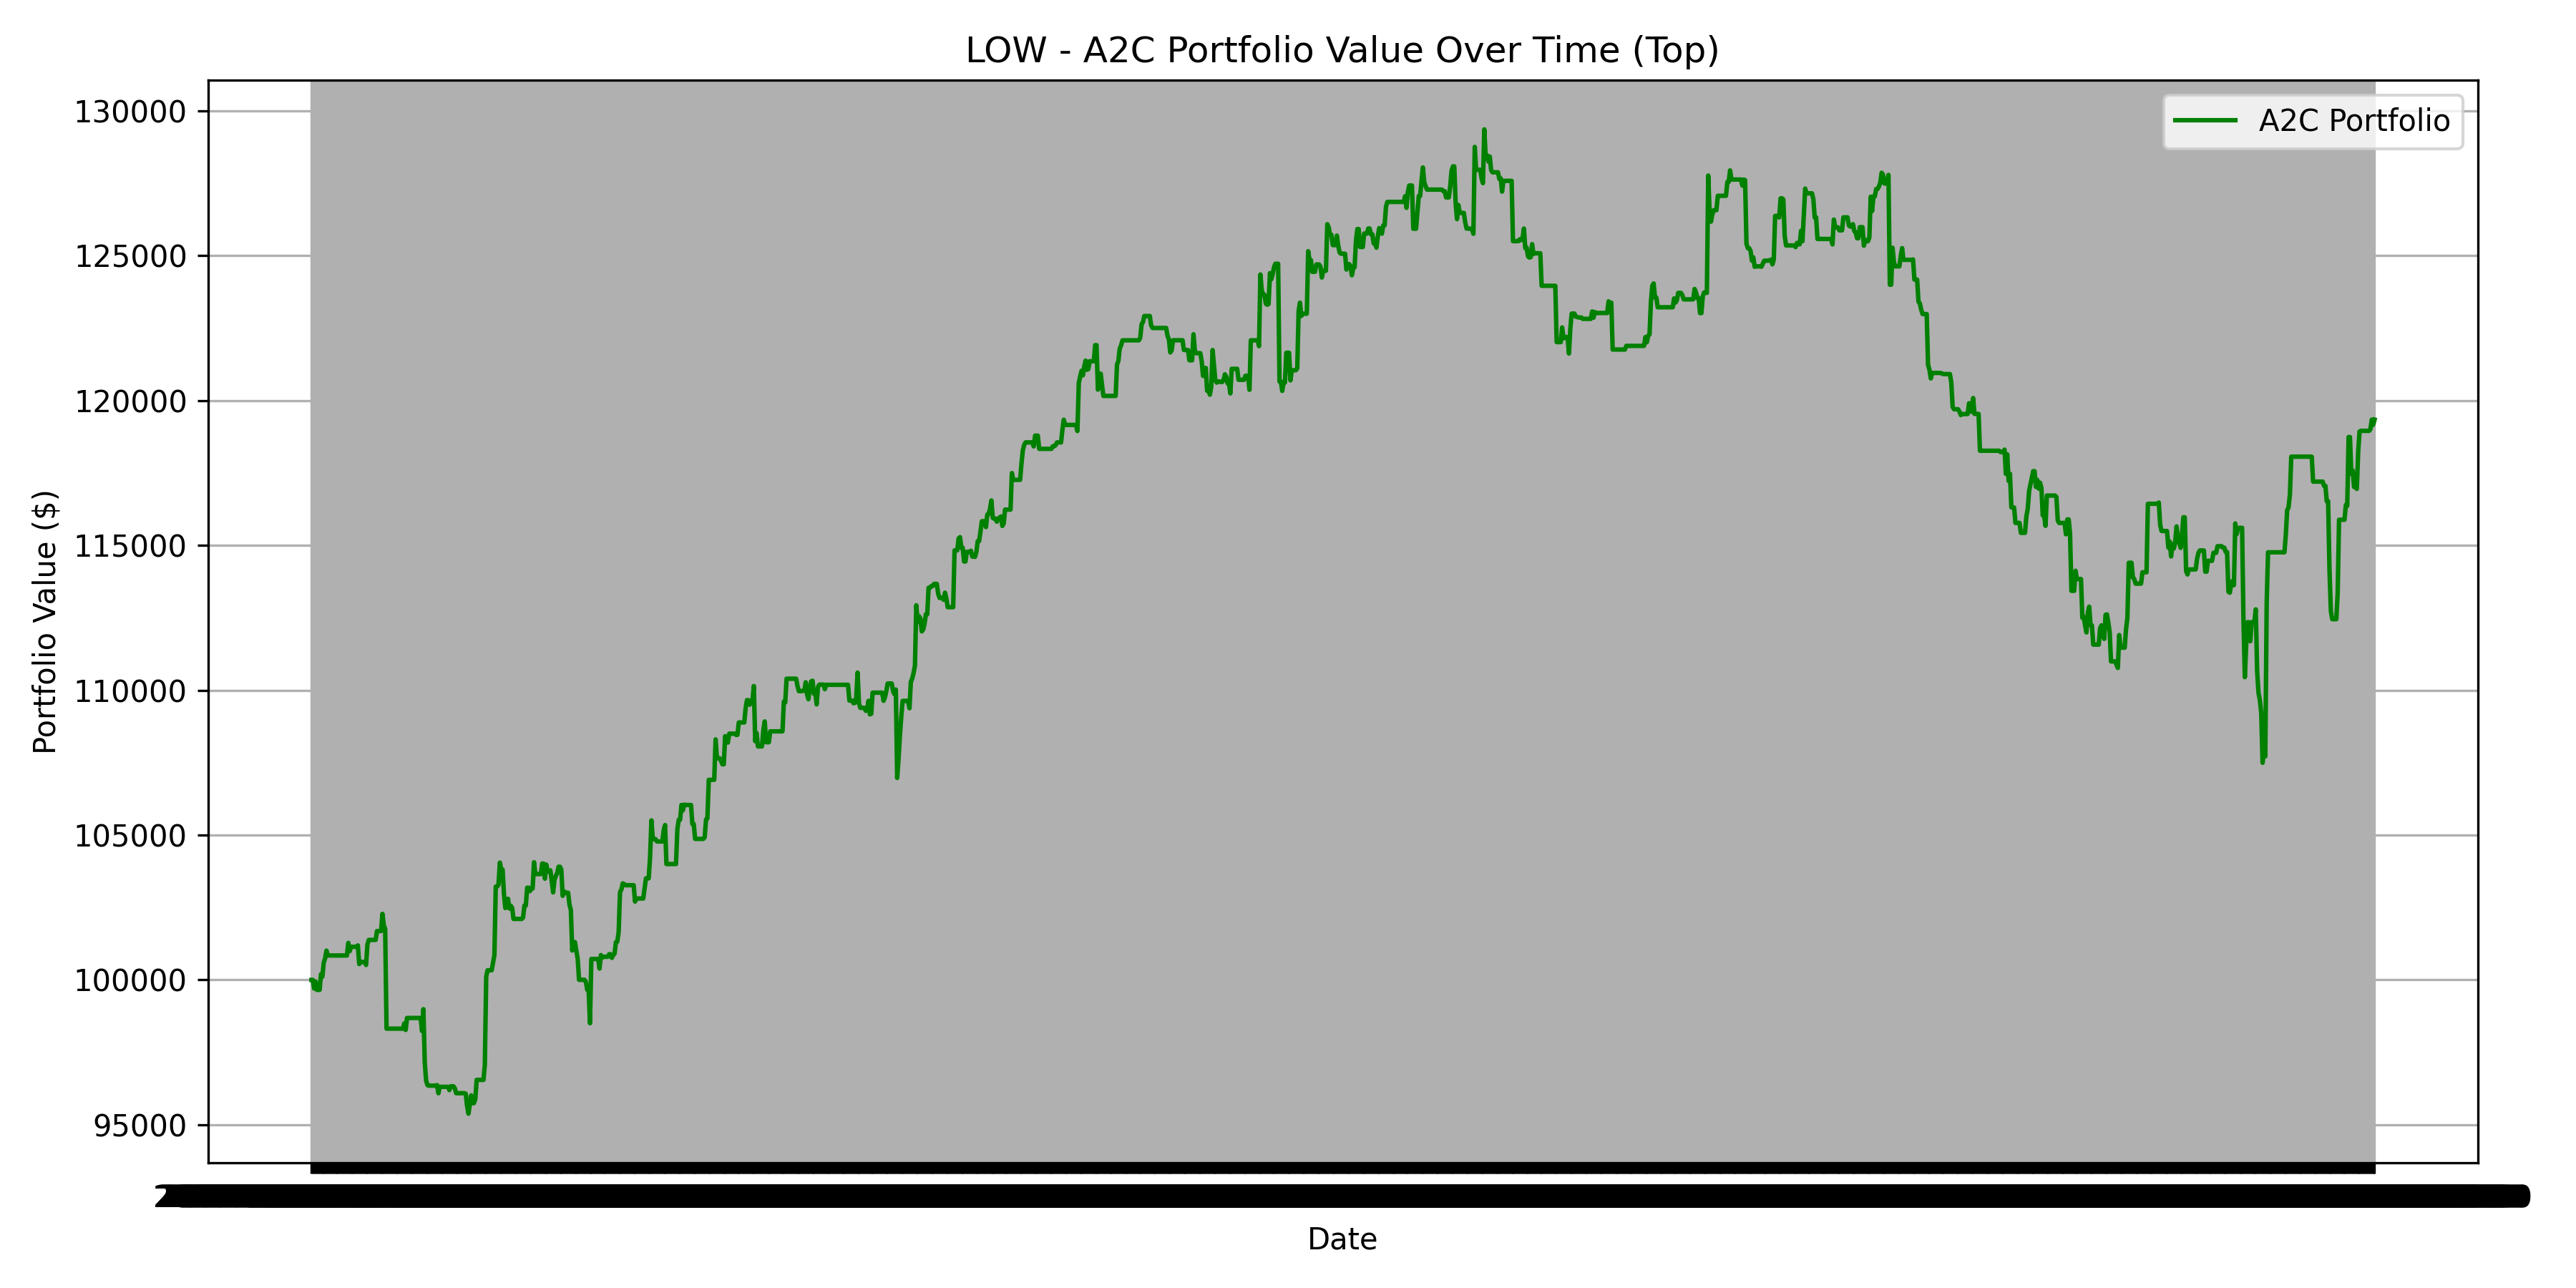


 Bottom 5 Tickers:
Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/UPS_a2c_portfolio_bottom.png


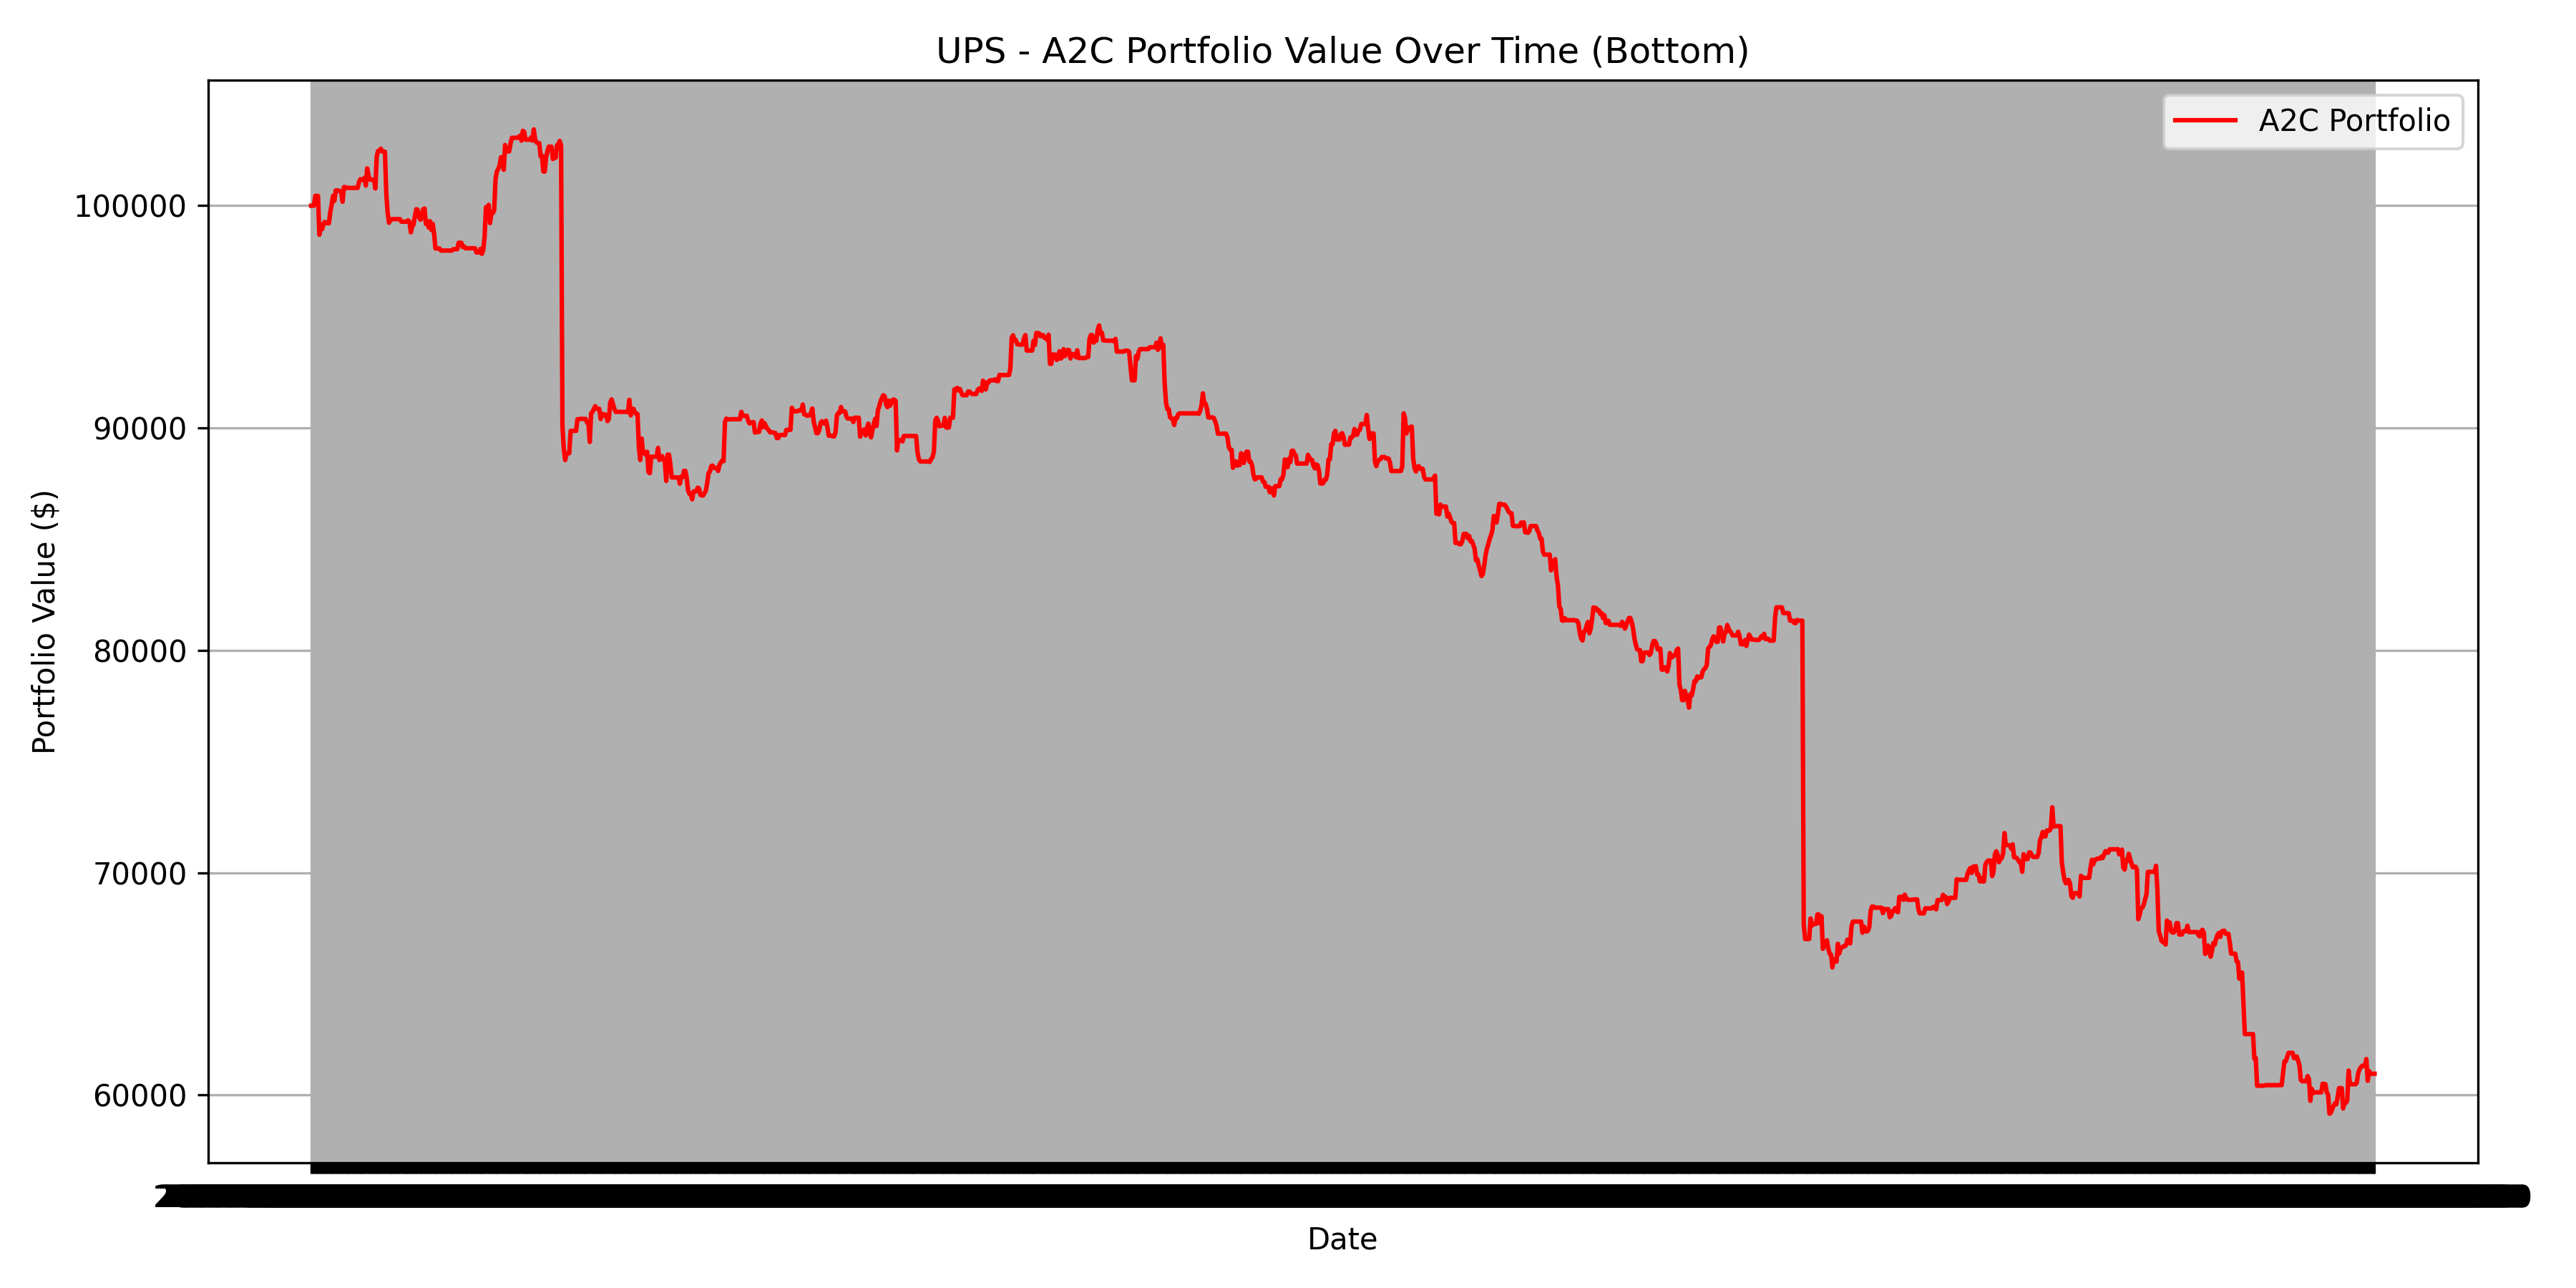

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/ORCL_a2c_portfolio_bottom.png


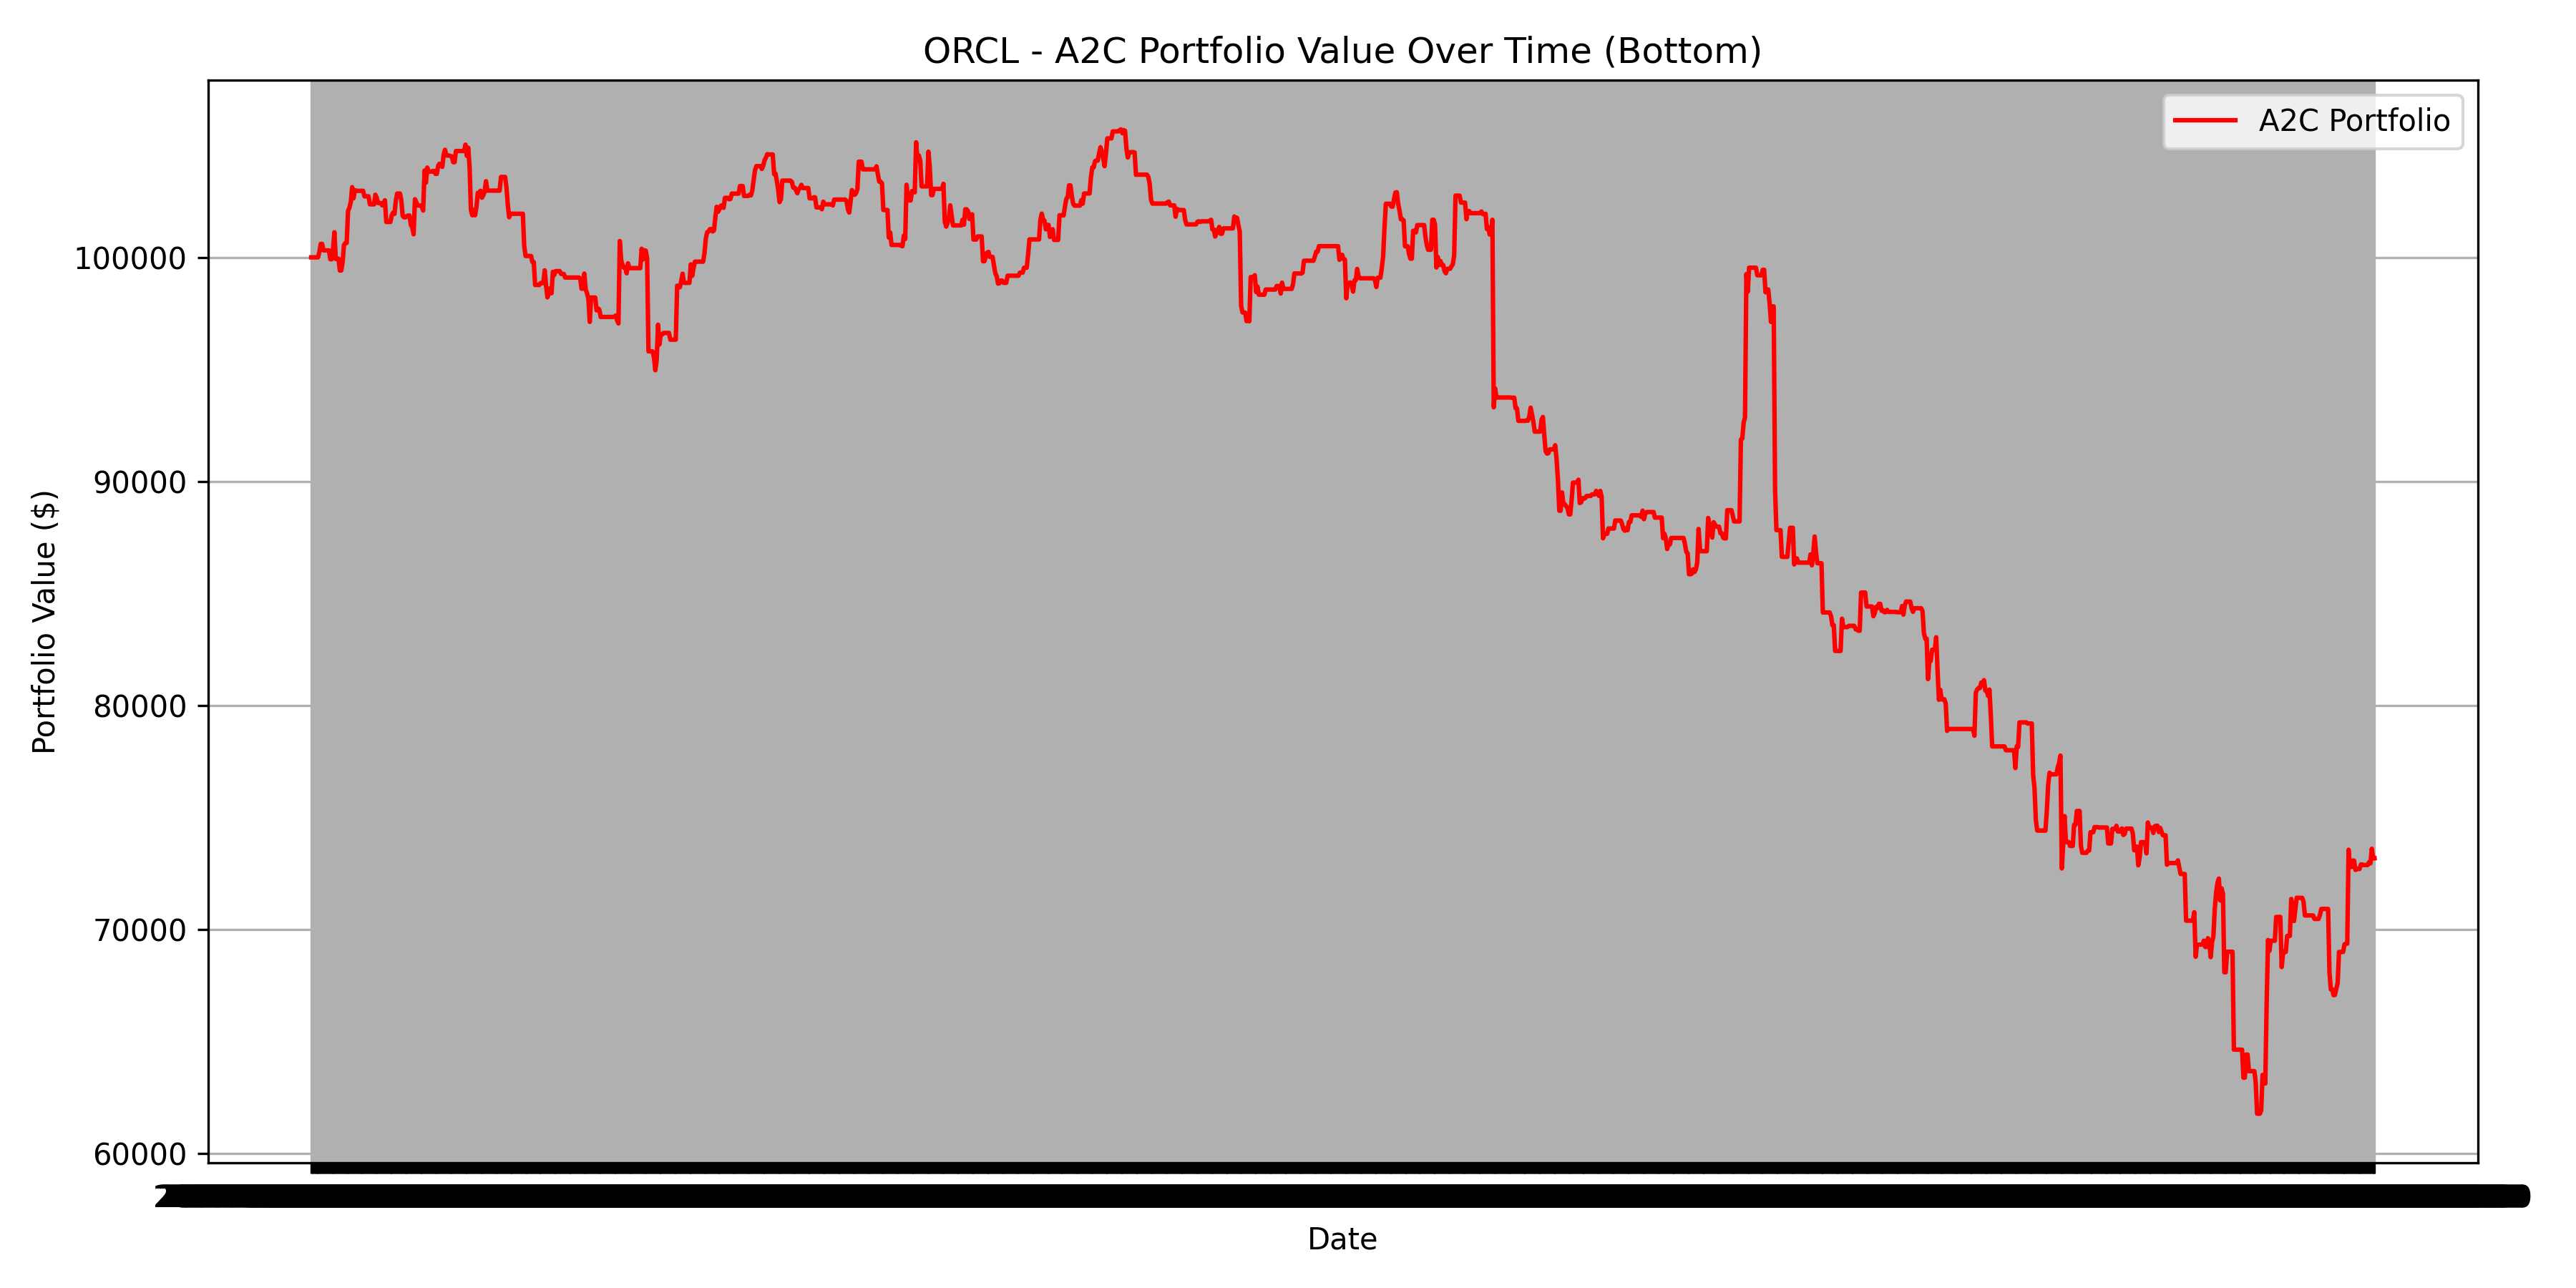

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/NKE_a2c_portfolio_bottom.png


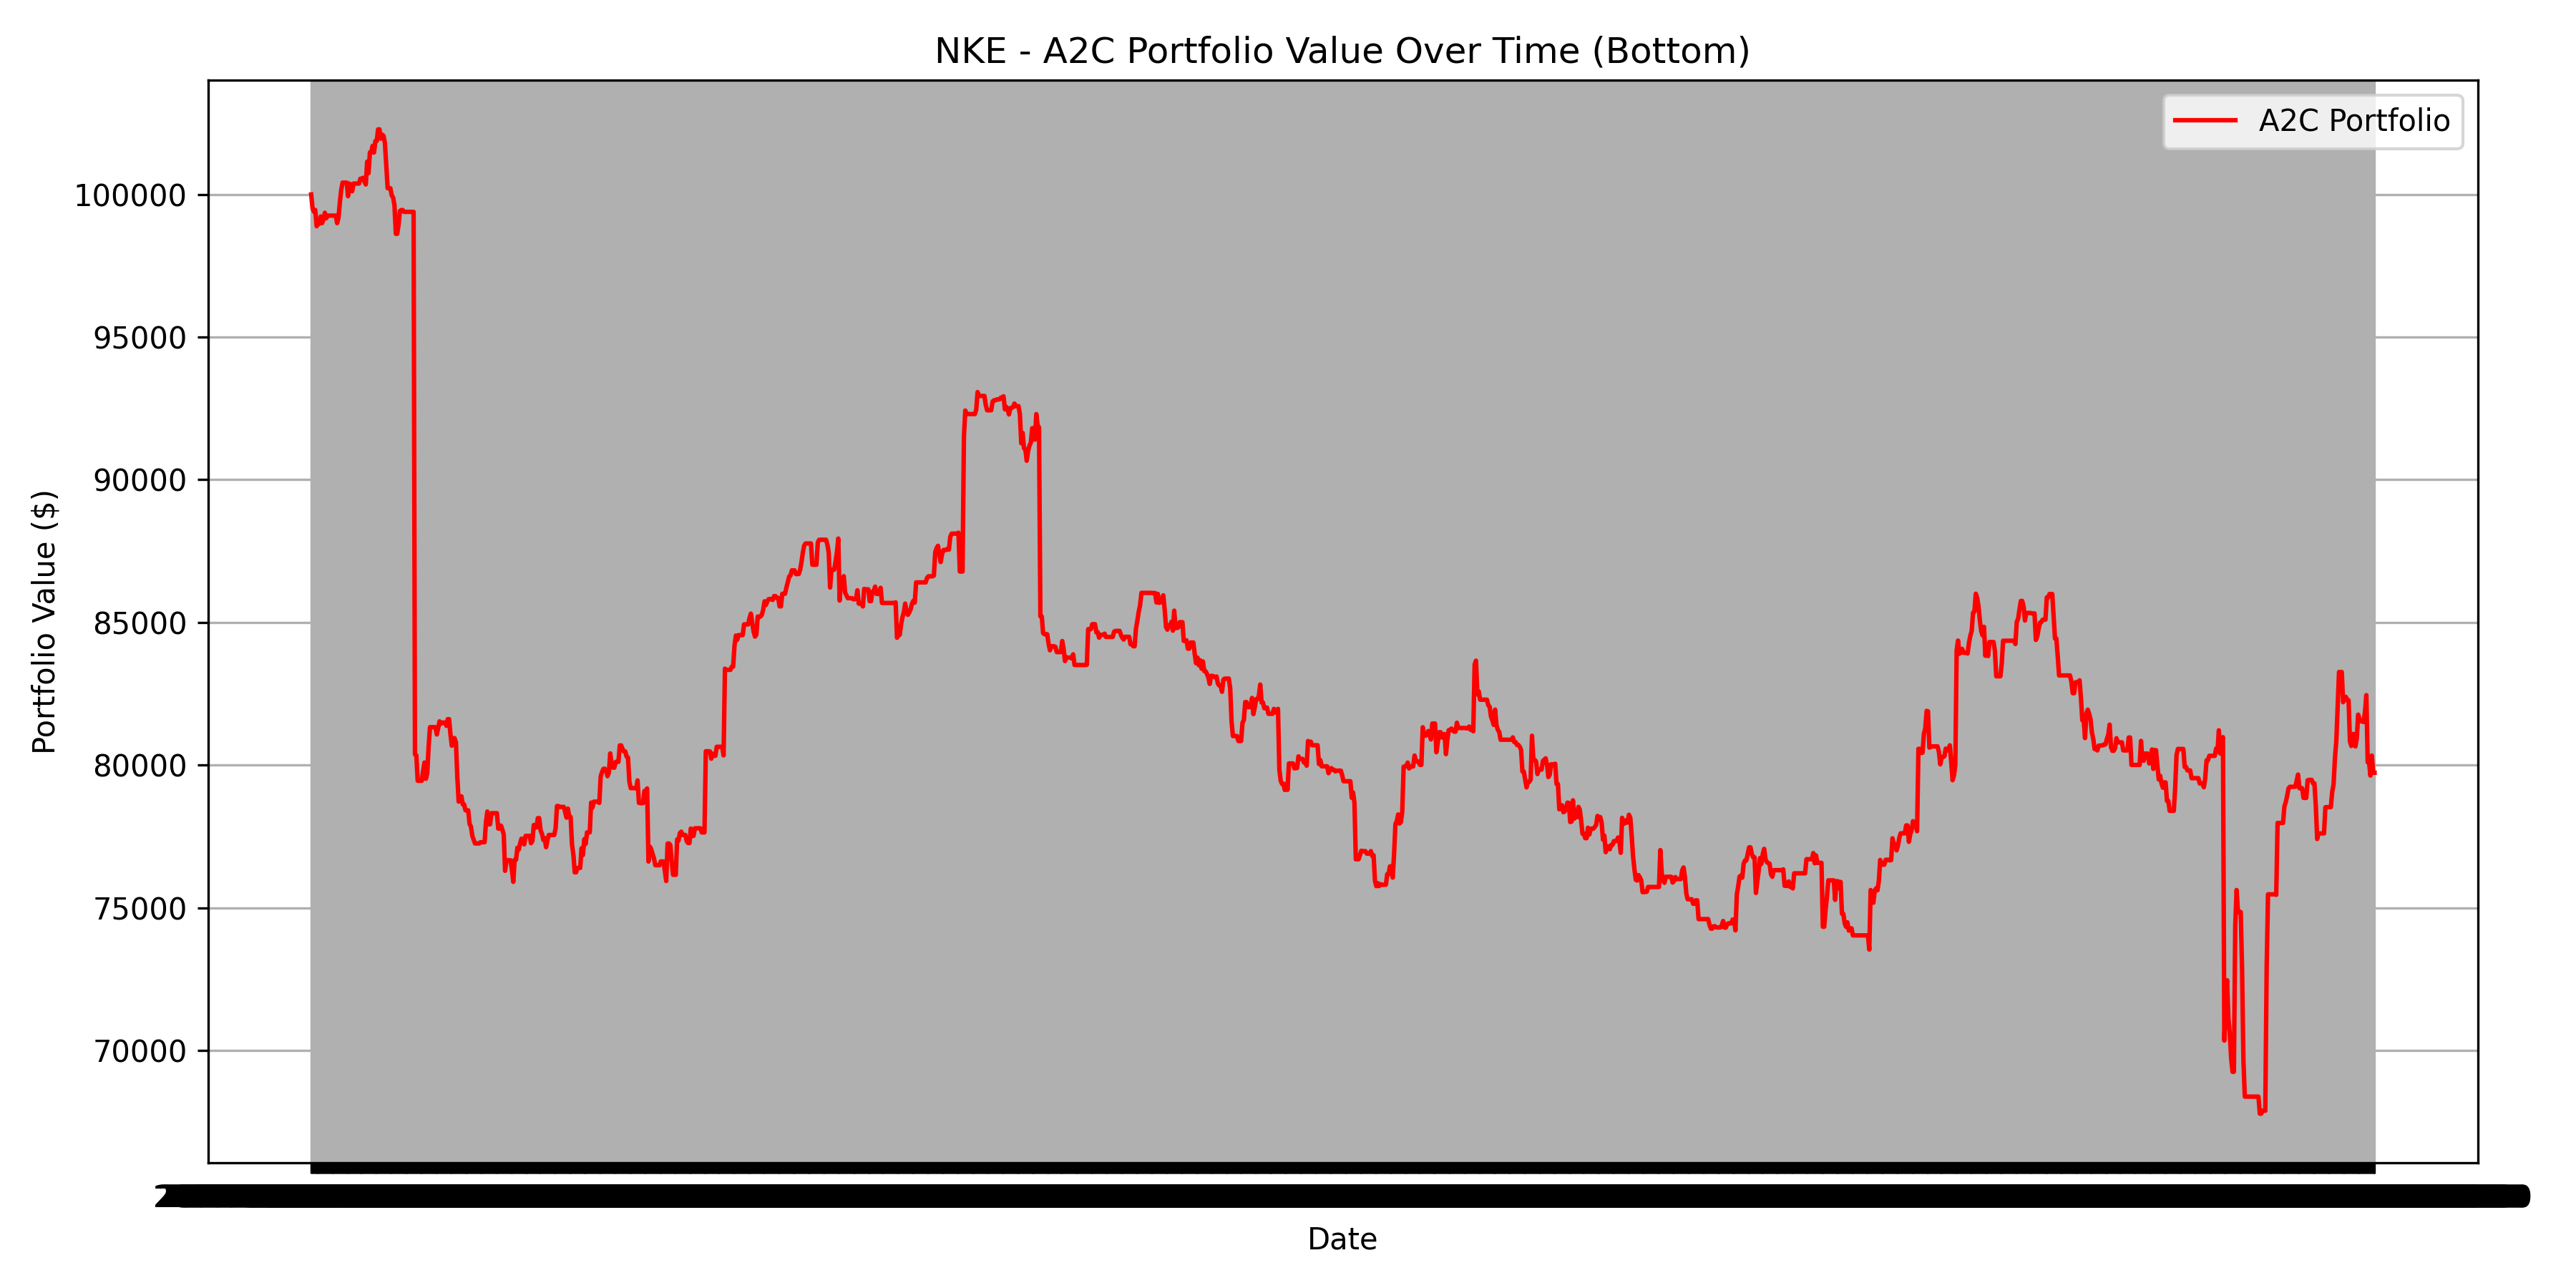

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/PFE_a2c_portfolio_bottom.png


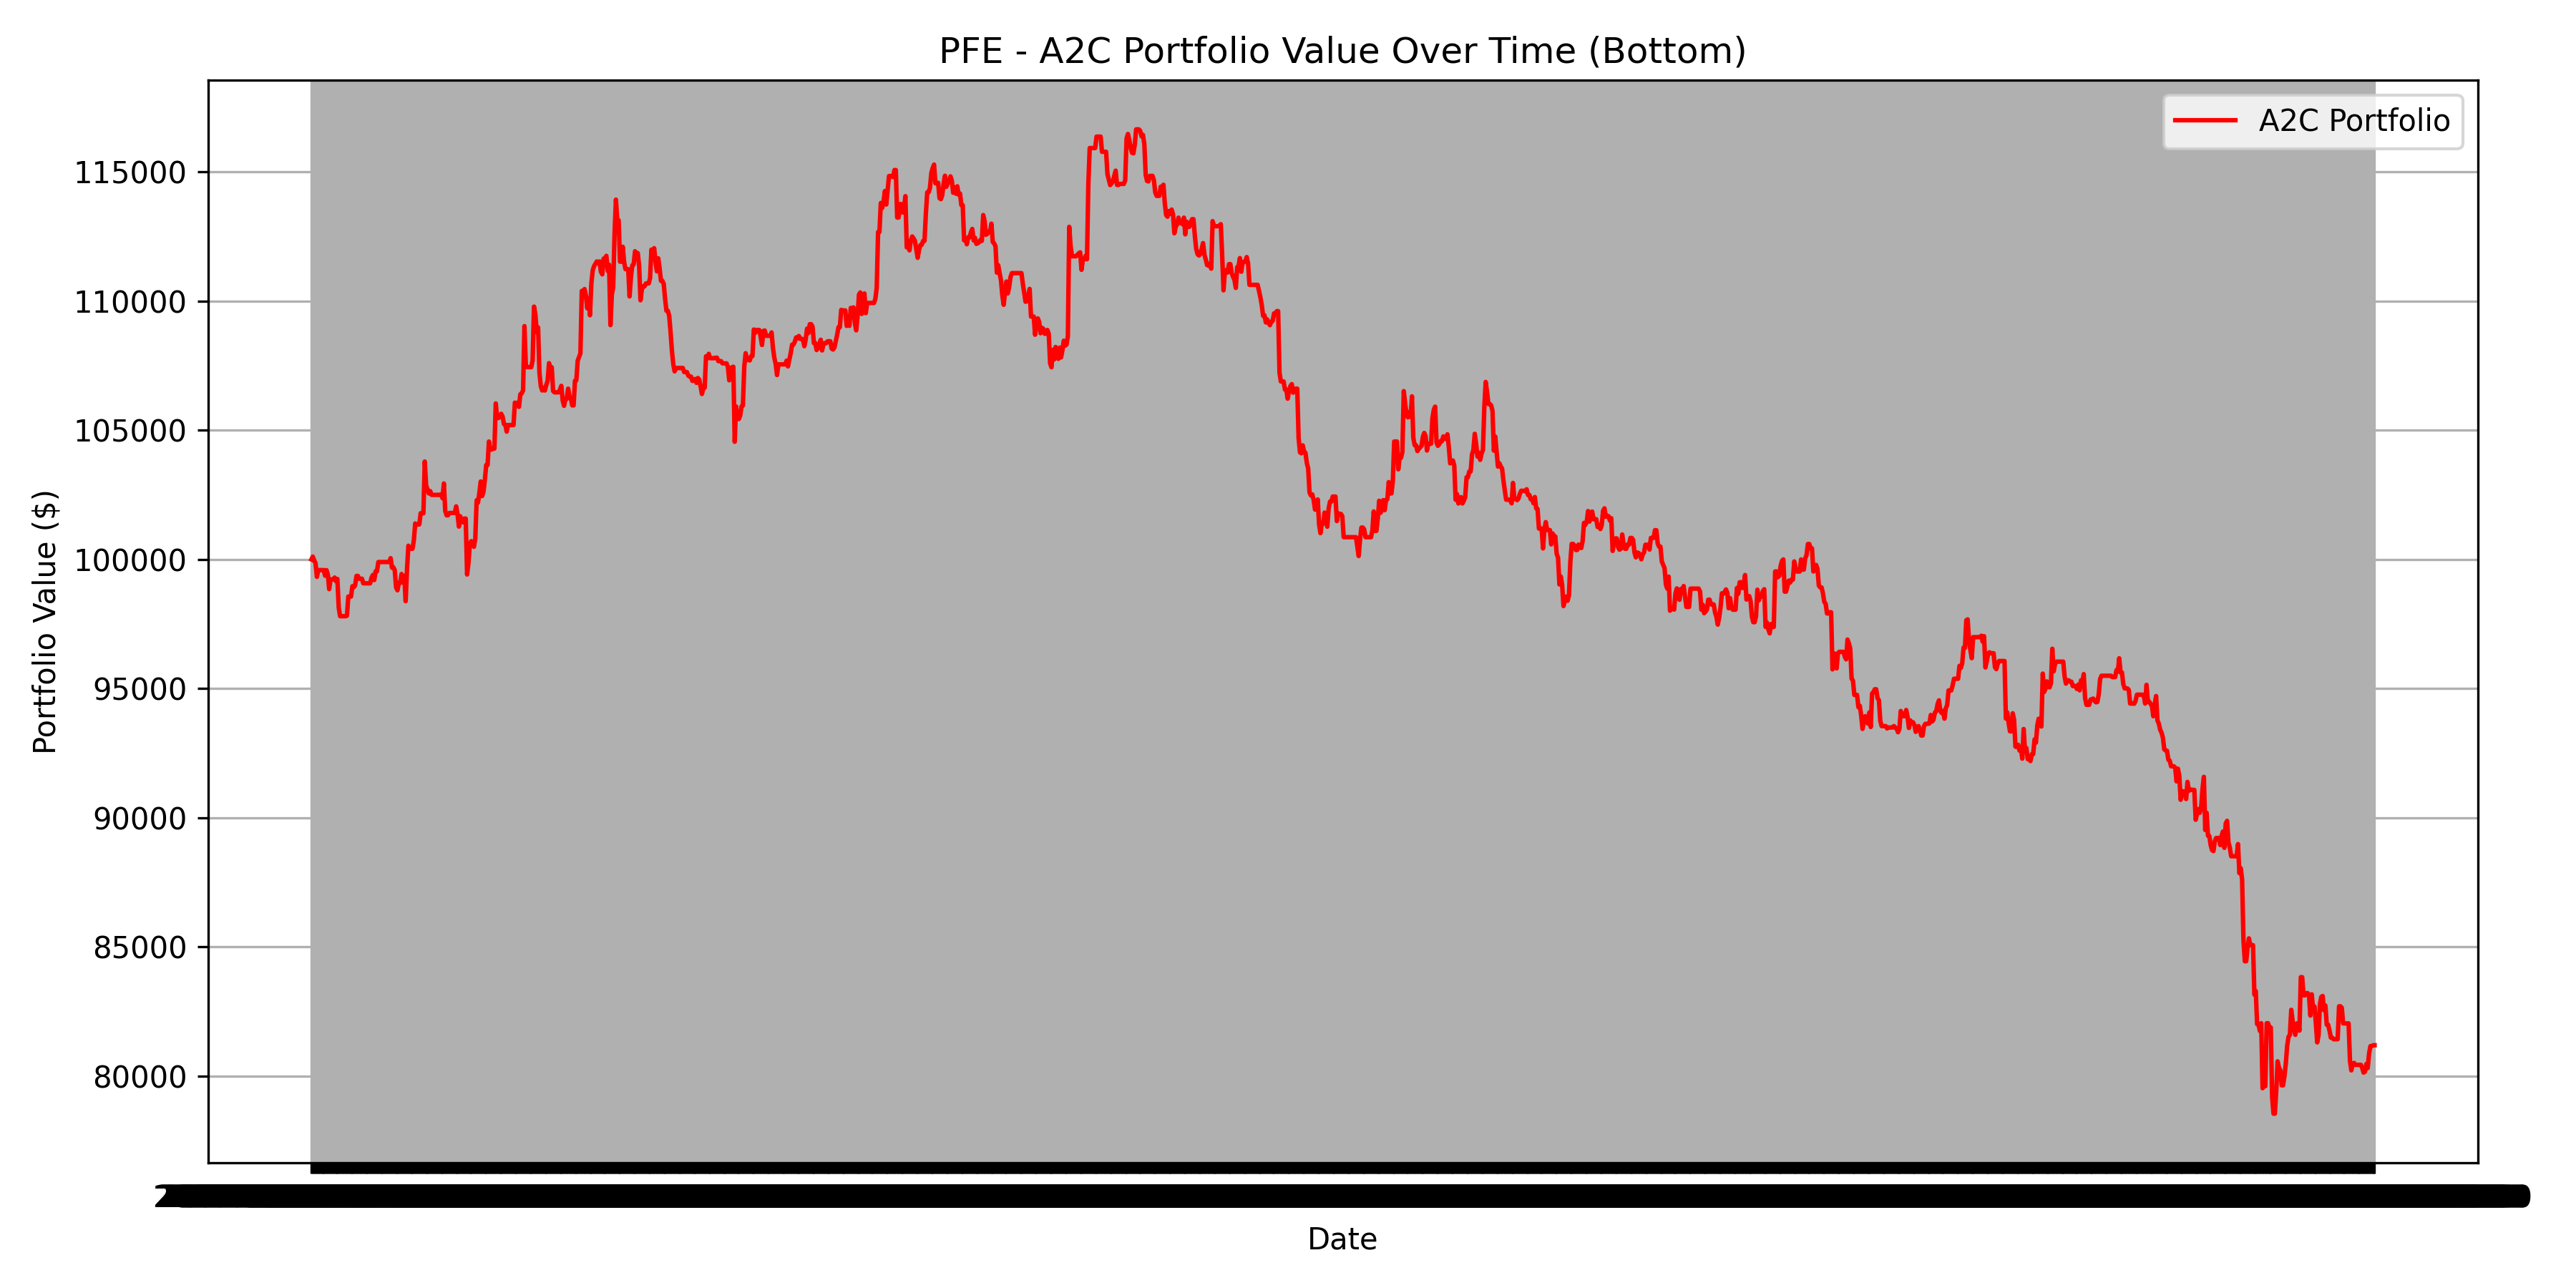

Saved plot: /content/drive/MyDrive/Results_May_2025/results_a2c_walkforward/plots/DHR_a2c_portfolio_bottom.png


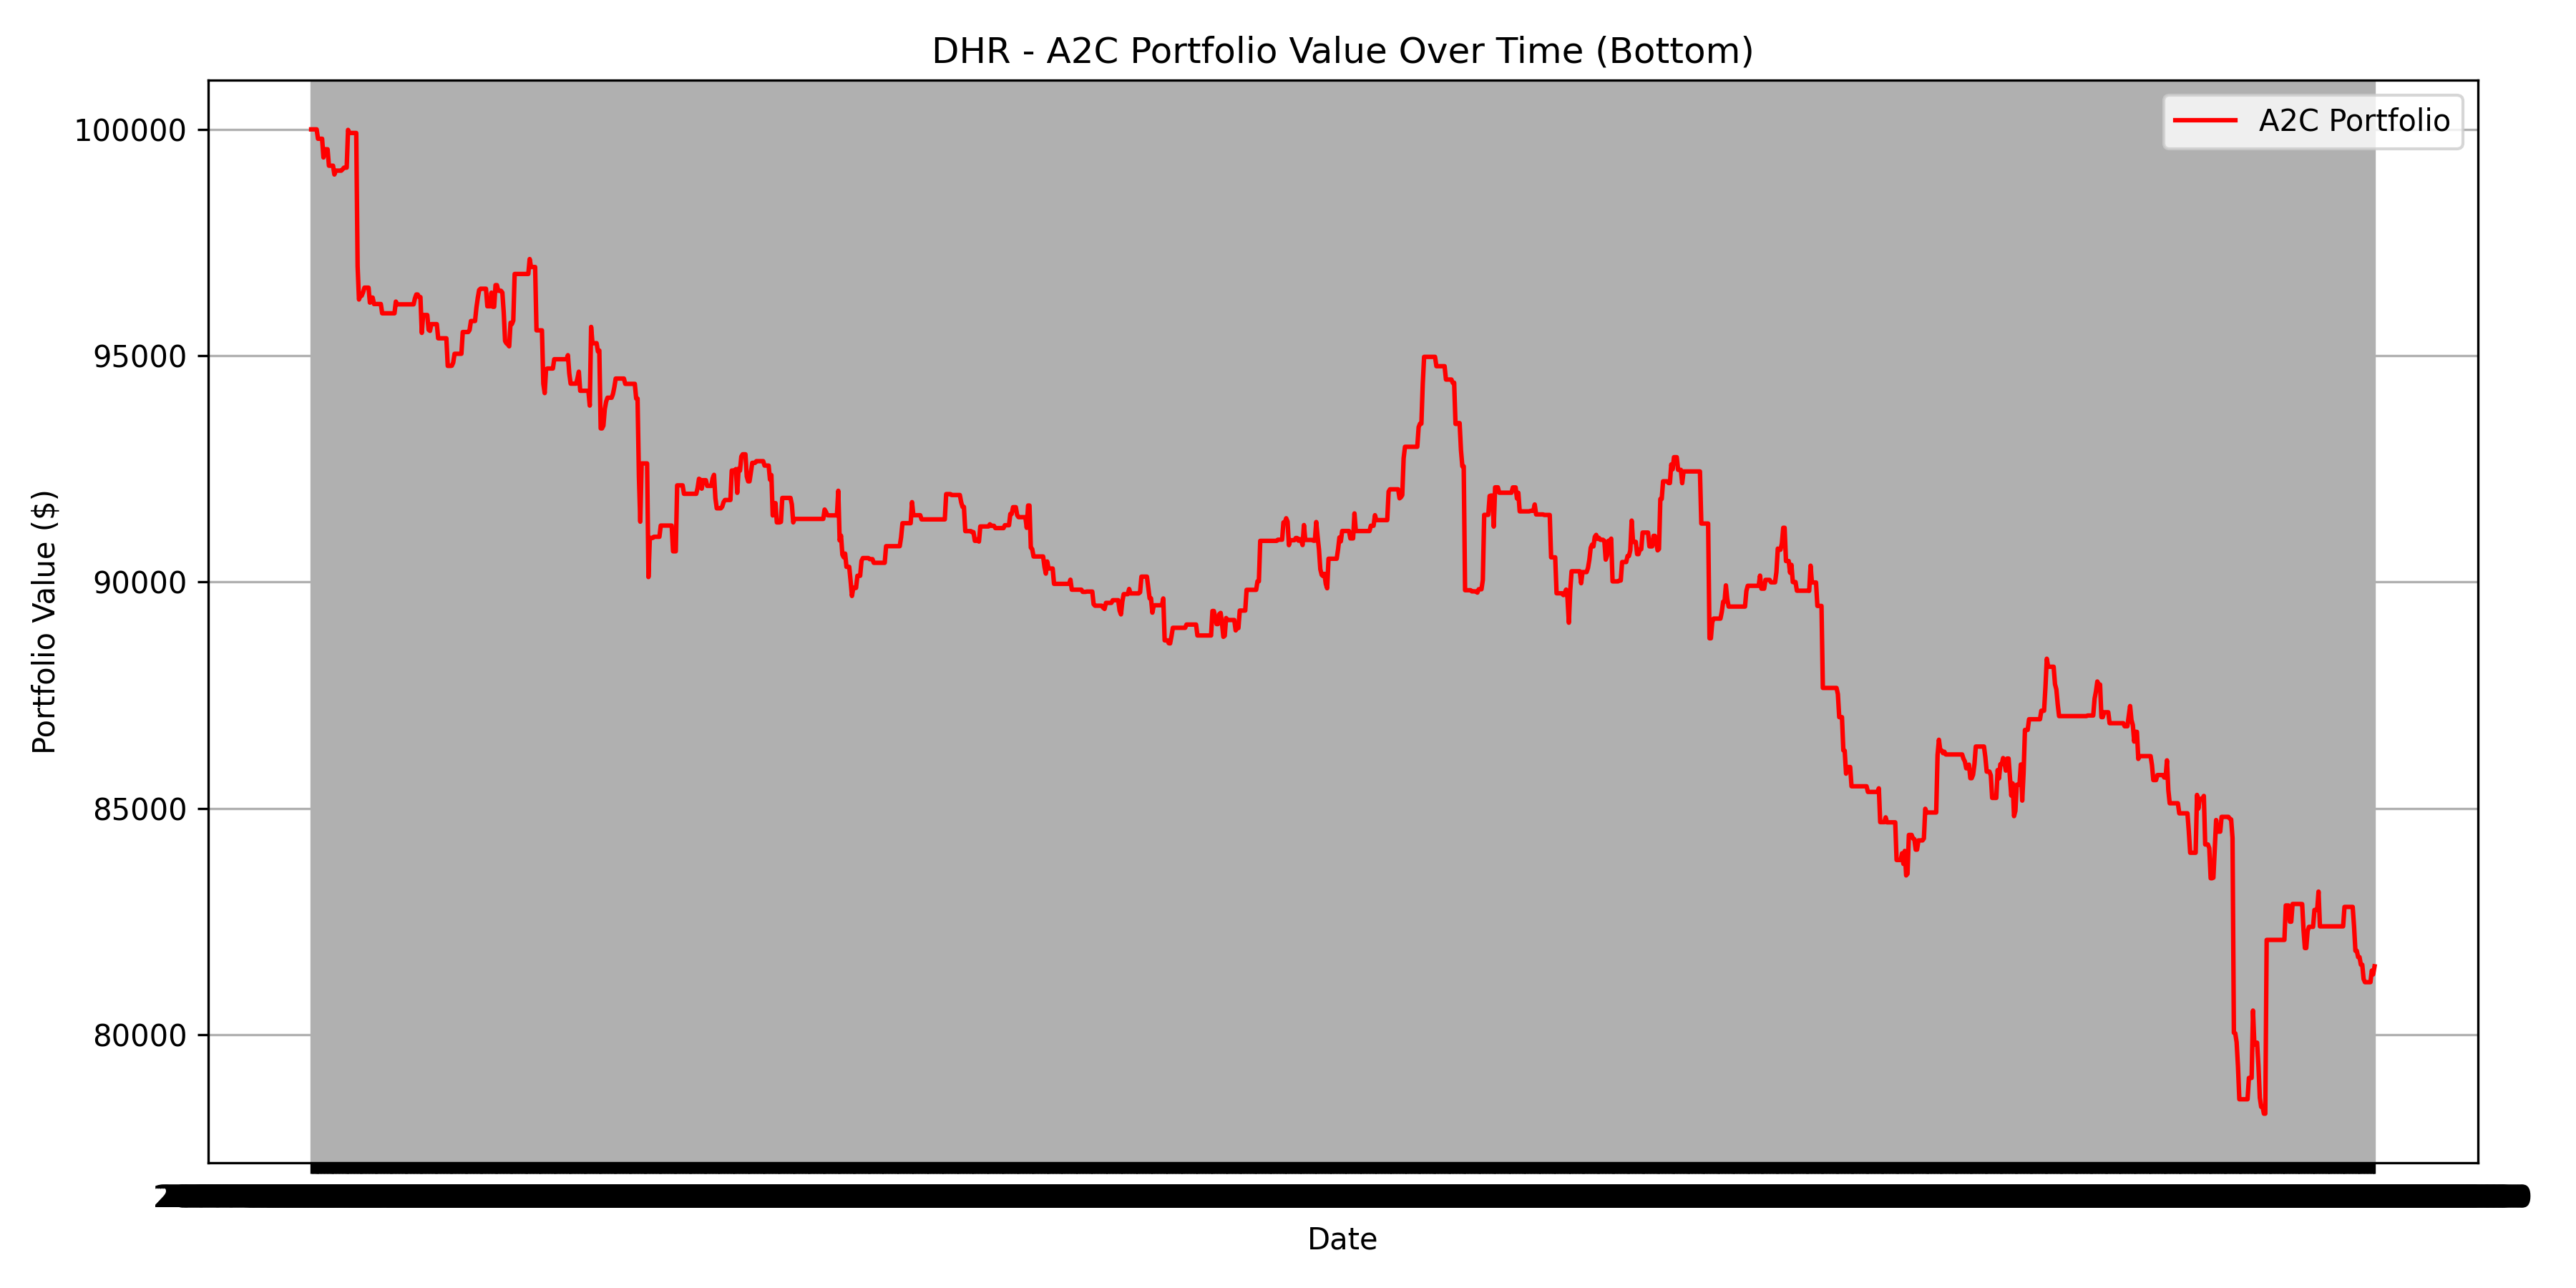

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

# === Configuration ===
RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_a2c_walkforward"
PLOT_DIR = os.path.join(RESULTS_DIR, "plots")
DATA_DIR = os.path.join(RESULTS_DIR, "data")
SUMMARY_PATH = os.path.join(RESULTS_DIR, "a2c_datebased_walkforward_summary.csv")

# Ensure plot directory exists
os.makedirs(PLOT_DIR, exist_ok=True)

# Load summary
summary_df = pd.read_csv(SUMMARY_PATH)
top_tickers = summary_df.sort_values("Final_Portfolio", ascending=False).head(5)["Ticker"]
bottom_tickers = summary_df.sort_values("Final_Portfolio", ascending=True).head(5)["Ticker"]

def plot_and_display(tickers, label):
    print(f"\n {label} 5 Tickers:")
    for ticker in tickers:
        file_path = os.path.join(DATA_DIR, f"{ticker}_portfolio.csv")
        plot_path = os.path.join(PLOT_DIR, f"{ticker}_a2c_portfolio_{label.lower()}.png")

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)

            plt.figure(figsize=(12, 6))
            plt.plot(df["Date"], df["Portfolio Value"], label="A2C Portfolio", color="green" if label == "Top" else "red")
            plt.title(f"{ticker} - A2C Portfolio Value Over Time ({label})")
            plt.xlabel("Date")
            plt.ylabel("Portfolio Value ($)")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.savefig(plot_path, dpi=300)
            plt.close()

            print(f"Saved plot: {plot_path}")
            display(Image(filename=plot_path))
        else:
            print(f"Missing portfolio file for {ticker}: {file_path}")

# Display top and bottom 5
plot_and_display(top_tickers, label="Top")
plot_and_display(bottom_tickers, label="Bottom")


In [37]:
import pandas as pd
from google.colab import files

# Assume results_df is already created
# results_df = pd.DataFrame(...)

# Save locally in the Colab environment
filename = "model_selector_ready_a2c.csv"
results_df.to_csv(filename, index=False)

# Download to your Mac
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>